<a href="https://colab.research.google.com/github/deejayprof/Adejumo-Samson-ssbc/blob/master/Metal_Samson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.pyplot import figure, show, cm

import pandas as pd
import numpy as np
import itertools as it
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import re
import scipy.cluster.hierarchy as sch

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
mpl.rc('pdf', fonttype=42)
import seaborn as sns

import random

from collections import Counter
import operator

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [ ]:
#To import a url
import urllib.request
get_url= urllib.request.urlopen('https://www.uic.edu')
print ( "Response Status: " + str (get_url.getcode()))

Response Status: 200


In [ ]:
from google.colab import drive
drive.mount('/Sam_DrewDrive')

In [ ]:
import pandas as pd
df = pd.read_csv('/Sam_DrewDrive/MyDrive/Colab Notebooks/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
df

In [ ]:
import pandas as pd
EDTA_minus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv')
EDTA_plus_df = pd.read_csv ('/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv')

In [ ]:
EDTA_minus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
EDTA_plus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Trim the columns to drop for EDTA minus and save into EDTA minus file
EDTA_minus_df.drop(EDTA_minus_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)

In [ ]:
#Trim the columns to drop for EDTA plus  and save into EDTA plus file Remove column 32 for plus
EDTA_plus_df.drop(EDTA_plus_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)

In [ ]:
EDTA_minus_df.sum()

HEK293_EDTA_minus_SEC_control_12a_20220603     3478
HEK293_EDTA_minus_SEC_control_13a_20220603     2170
HEK293_EDTA_minus_SEC_control_14a_20220603    17320
HEK293_EDTA_minus_SEC_control_15a_20220603    23408
HEK293_EDTA_minus_SEC_control_16a_20220603    26128
HEK293_EDTA_minus_SEC_control_17a_20220603    25698
HEK293_EDTA_minus_SEC_control_18a_20220603    25482
HEK293_EDTA_minus_SEC_control_19a_20220603    18110
HEK293_EDTA_minus_SEC_control_20a_20220603    32244
HEK293_EDTA_minus_SEC_control_21a_20220603    22130
HEK293_EDTA_minus_SEC_control_22a_20220603    25822
HEK293_EDTA_minus_SEC_control_23a_20220603    18924
HEK293_EDTA_minus_SEC_control_24a_20220603    20430
HEK293_EDTA_minus_SEC_control_25a_20220603    20886
HEK293_EDTA_minus_SEC_control_26a_20220603    26826
HEK293_EDTA_minus_SEC_control_27a_20220603    28342
HEK293_EDTA_minus_SEC_control_28a_20220603    26172
HEK293_EDTA_minus_SEC_control_29a_20220603    27088
HEK293_EDTA_minus_SEC_control_30a_20220603    31638
HEK293_EDTA_

In [ ]:
EDTA_plus_df.sum()

HEK293_EDTA_plus_SEC_treatment_12a_20220603     3030
HEK293_EDTA_plus_SEC_treatment_13a_20220603     1806
HEK293_EDTA_plus_SEC_treatment_14a_20220603     8948
HEK293_EDTA_plus_SEC_treatment_15a_20220603     4910
HEK293_EDTA_plus_SEC_treatment_16a_20220603    17168
HEK293_EDTA_plus_SEC_treatment_17a_20220603    24546
HEK293_EDTA_plus_SEC_treatment_18a_20220603    20904
HEK293_EDTA_plus_SEC_treatment_19a_20220603    13692
HEK293_EDTA_plus_SEC_treatment_20a_20220603    23752
HEK293_EDTA_plus_SEC_treatment_21a_20220603    25256
HEK293_EDTA_plus_SEC_treatment_22a_20220603    25886
HEK293_EDTA_plus_SEC_treatment_23a_20220603    26580
HEK293_EDTA_plus_SEC_treatment_24a_20220603    25582
HEK293_EDTA_plus_SEC_treatment_25a_20220603    28374
HEK293_EDTA_plus_SEC_treatment_26a_20220603    28442
HEK293_EDTA_plus_SEC_treatment_27a_20220603    29768
HEK293_EDTA_plus_SEC_treatment_28a_20220603    30222
HEK293_EDTA_plus_SEC_treatment_29a_20220603    30662
HEK293_EDTA_plus_SEC_treatment_30a_20220603   

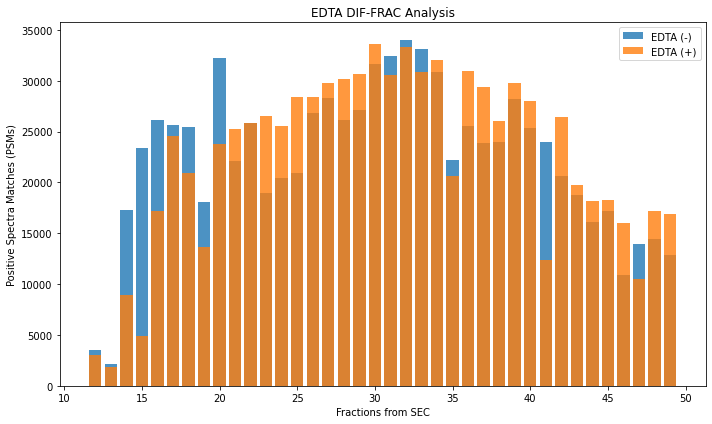

In [ ]:
#Plotting the bar charts of EDTA plus and EDTA minus to compare the elution profiles
plt.rcParams["figure.figsize"] = [10, 6]
plt.bar(range(12,50), EDTA_minus_df.sum(), alpha=0.8, label="EDTA (-)")
plt.bar(range(12, 50), EDTA_plus_df.sum(),  alpha=0.8, label="EDTA (+)")
plt.legend()
plt.title("EDTA DIF-FRAC Analysis")
plt.xlabel("Fractions from SEC")
plt.ylabel("Positive Spectra Matches (PSMs)")
plt.savefig("/Sam_DrewDrive/MyDrive/MyEDTA_DIFFRAC.pdf")

In [ ]:
#Number of proteins with rowsums > than 10 psm in EDTA minus
EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=10]

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
17,0,0,0,0,0,0,3,5,0,0,...,14,66,14,7,3,4,3,2,6,2
25,0,0,0,0,0,0,0,0,0,0,...,0,1,1,16,13,5,5,5,1,0
27,0,0,2,0,0,1,2,1,0,2,...,0,0,0,0,0,0,0,0,0,0
36,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,1,1,0,2
52,0,0,0,2,0,2,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11905,0,0,0,3,3,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11908,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Number of proteins with rowsums > than 10 psm in EDTA plus
plus_above10 = EDTA_plus_df[EDTA_plus_df.sum(axis=1)>=10]
plus_above10.sum()

HEK293_EDTA_plus_SEC_treatment_12a_20220603     2771
HEK293_EDTA_plus_SEC_treatment_13a_20220603     1604
HEK293_EDTA_plus_SEC_treatment_14a_20220603     8447
HEK293_EDTA_plus_SEC_treatment_15a_20220603     4867
HEK293_EDTA_plus_SEC_treatment_16a_20220603    16682
HEK293_EDTA_plus_SEC_treatment_17a_20220603    23735
HEK293_EDTA_plus_SEC_treatment_18a_20220603    20356
HEK293_EDTA_plus_SEC_treatment_19a_20220603    13551
HEK293_EDTA_plus_SEC_treatment_20a_20220603    23176
HEK293_EDTA_plus_SEC_treatment_21a_20220603    24670
HEK293_EDTA_plus_SEC_treatment_22a_20220603    25353
HEK293_EDTA_plus_SEC_treatment_23a_20220603    26115
HEK293_EDTA_plus_SEC_treatment_24a_20220603    25163
HEK293_EDTA_plus_SEC_treatment_25a_20220603    27878
HEK293_EDTA_plus_SEC_treatment_26a_20220603    27839
HEK293_EDTA_plus_SEC_treatment_27a_20220603    29112
HEK293_EDTA_plus_SEC_treatment_28a_20220603    29627
HEK293_EDTA_plus_SEC_treatment_29a_20220603    30115
HEK293_EDTA_plus_SEC_treatment_30a_20220603   

In [ ]:
#Number of proteins with rowsums > than 10 psm in EDTA minus
minus_above10 = EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=10]
minus_above10.sum()

HEK293_EDTA_minus_SEC_control_12a_20220603     3216
HEK293_EDTA_minus_SEC_control_13a_20220603     1918
HEK293_EDTA_minus_SEC_control_14a_20220603    16610
HEK293_EDTA_minus_SEC_control_15a_20220603    22758
HEK293_EDTA_minus_SEC_control_16a_20220603    25457
HEK293_EDTA_minus_SEC_control_17a_20220603    25109
HEK293_EDTA_minus_SEC_control_18a_20220603    24925
HEK293_EDTA_minus_SEC_control_19a_20220603    17562
HEK293_EDTA_minus_SEC_control_20a_20220603    31581
HEK293_EDTA_minus_SEC_control_21a_20220603    21643
HEK293_EDTA_minus_SEC_control_22a_20220603    25262
HEK293_EDTA_minus_SEC_control_23a_20220603    18466
HEK293_EDTA_minus_SEC_control_24a_20220603    19892
HEK293_EDTA_minus_SEC_control_25a_20220603    20344
HEK293_EDTA_minus_SEC_control_26a_20220603    26126
HEK293_EDTA_minus_SEC_control_27a_20220603    27717
HEK293_EDTA_minus_SEC_control_28a_20220603    25601
HEK293_EDTA_minus_SEC_control_29a_20220603    26617
HEK293_EDTA_minus_SEC_control_30a_20220603    30990
HEK293_EDTA_

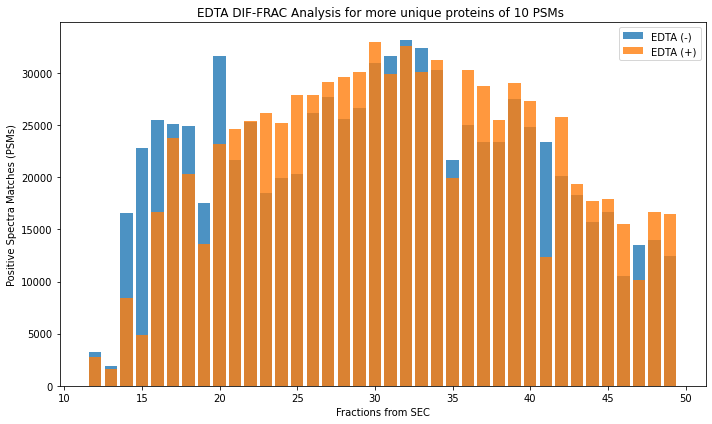

In [ ]:
#Plotting the bar charts of EDTA plus and EDTA minus to compare the elution profiles of 10 PSMs
plt.rcParams["figure.figsize"] = [10, 6]
plt.bar(range(12,50), minus_above10.sum(), alpha=0.8, label="EDTA (-)")
plt.bar(range(12, 50), plus_above10.sum(),  alpha=0.8, label="EDTA (+)")
plt.legend()
plt.title("EDTA DIF-FRAC Analysis for more unique proteins of 10 PSMs ")
plt.xlabel("Fractions from SEC")
plt.ylabel("Positive Spectra Matches (PSMs)")
plt.savefig("/Sam_DrewDrive/MyDrive/EDTA_DIFFRAC_10PSMs.pdf")

In [ ]:
#Number of proteins with rowsums > than 50 psm in EDTA minus
minus_above_50=EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=50]
minus_above_50.sum()

HEK293_EDTA_minus_SEC_control_12a_20220603     3105
HEK293_EDTA_minus_SEC_control_13a_20220603     1799
HEK293_EDTA_minus_SEC_control_14a_20220603    15573
HEK293_EDTA_minus_SEC_control_15a_20220603    21391
HEK293_EDTA_minus_SEC_control_16a_20220603    24214
HEK293_EDTA_minus_SEC_control_17a_20220603    23950
HEK293_EDTA_minus_SEC_control_18a_20220603    23758
HEK293_EDTA_minus_SEC_control_19a_20220603    16707
HEK293_EDTA_minus_SEC_control_20a_20220603    29939
HEK293_EDTA_minus_SEC_control_21a_20220603    20494
HEK293_EDTA_minus_SEC_control_22a_20220603    23726
HEK293_EDTA_minus_SEC_control_23a_20220603    17709
HEK293_EDTA_minus_SEC_control_24a_20220603    18938
HEK293_EDTA_minus_SEC_control_25a_20220603    19200
HEK293_EDTA_minus_SEC_control_26a_20220603    24544
HEK293_EDTA_minus_SEC_control_27a_20220603    26172
HEK293_EDTA_minus_SEC_control_28a_20220603    24493
HEK293_EDTA_minus_SEC_control_29a_20220603    25579
HEK293_EDTA_minus_SEC_control_30a_20220603    29224
HEK293_EDTA_

In [ ]:
#Number of proteins with rowsums > than 50 psm in EDTA plus
plus_above_50 = EDTA_plus_df[EDTA_plus_df.sum(axis=1)>=50]
plus_above_50.sum()

HEK293_EDTA_plus_SEC_treatment_12a_20220603     2654
HEK293_EDTA_plus_SEC_treatment_13a_20220603     1477
HEK293_EDTA_plus_SEC_treatment_14a_20220603     7880
HEK293_EDTA_plus_SEC_treatment_15a_20220603     4661
HEK293_EDTA_plus_SEC_treatment_16a_20220603    15858
HEK293_EDTA_plus_SEC_treatment_17a_20220603    22307
HEK293_EDTA_plus_SEC_treatment_18a_20220603    19448
HEK293_EDTA_plus_SEC_treatment_19a_20220603    12966
HEK293_EDTA_plus_SEC_treatment_20a_20220603    21409
HEK293_EDTA_plus_SEC_treatment_21a_20220603    23427
HEK293_EDTA_plus_SEC_treatment_22a_20220603    24035
HEK293_EDTA_plus_SEC_treatment_23a_20220603    25045
HEK293_EDTA_plus_SEC_treatment_24a_20220603    24134
HEK293_EDTA_plus_SEC_treatment_25a_20220603    26567
HEK293_EDTA_plus_SEC_treatment_26a_20220603    26242
HEK293_EDTA_plus_SEC_treatment_27a_20220603    27263
HEK293_EDTA_plus_SEC_treatment_28a_20220603    27907
HEK293_EDTA_plus_SEC_treatment_29a_20220603    28579
HEK293_EDTA_plus_SEC_treatment_30a_20220603   

Text(0, 0.5, 'Positive Spectra Matches (PSMs)')

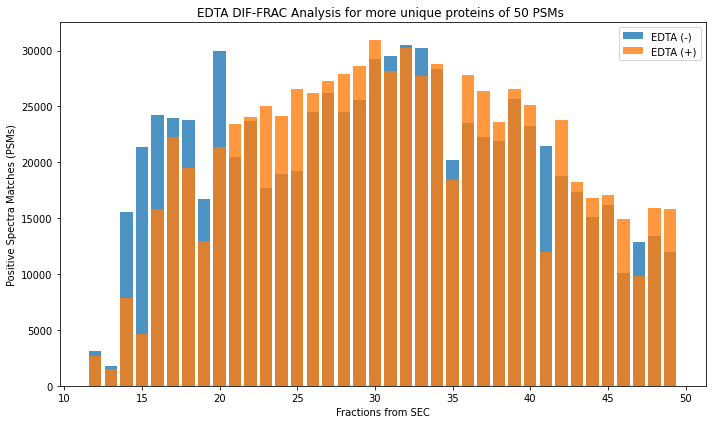

In [ ]:
#Plotting the elution profiles of some proteins in EDTA Plus and Minus to compare metal location and numbers
plt.rcParams["figure.figsize"] = [10, 6]
plt.bar(range(12,50), minus_above_50.sum(), alpha=0.8, label="EDTA (-)")
plt.bar(range(12, 50), plus_above_50.sum(),  alpha=0.8, label="EDTA (+)")
plt.legend()
plt.title("EDTA DIF-FRAC Analysis for more unique proteins of 50 PSMs ")
plt.xlabel("Fractions from SEC")
plt.ylabel("Positive Spectra Matches (PSMs)")
#There is no die

In [ ]:
EDTA_minus_df

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
11909,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Trying to add sparklines. I will work on it later
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import base64
from io import BytesIO
import matplotlib
matplotlib.use("Agg")
def sparkline(data, figsize=(4,0.25),**kwags):
    EDTA_plus_df.loc['Q9Y253'] = list(EDTA_plus_df.loc['Q9Y253'])
    fig,ax = plt.subplots(1,1,figsize=figsize,**kwags)
    ax.plot(EDTA_plus_df.loc['Q9Y253'])
    
    for k,v in ax.spines.items():
        v.set_visible(False)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.plot(len(EDTA_plus_df.loc['Q9Y253'])-1, EDTA_plus_df.loc['Q9Y253'][len(EDTA_plus_df.loc['Q9Y253'])-1], 'r.')
    
    ax.fill_between(range(len(EDTA_plus_df.loc['Q9Y253'])), EDTA_plus_df.loc['Q9Y253'], len(EDTA_plus_df.loc['Q9Y253'])*[min(EDTA_plus_df.loc['Q9Y253'])], alpha=0.1)
    
    img = BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
#     plt.show()
    plt.close()
    
    return base64.b64encode(img.read()).decode("utf-8")

In [ ]:
#creating a dictionary of all PSMs >= 10 across each control replicate
More_confident_uniques_Proteins = {"EDTA Plus": len(EDTA_plus_df[EDTA_plus_df.sum(axis=1)>=10]), 
                                     "EDTA Minus": len(EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=10])}
print(More_confident_uniques_Proteins)

{'EDTA Plus': 3867, 'EDTA Minus': 3593}


In [ ]:
EDTA_minus_df

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
11909,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Metal_df = pd.read_csv('/Sam_DrewDrive/MyDrive/metal.csv')
Metal_df

In [ ]:
Metal_PDB_df = pd.read_csv('/Sam_DrewDrive/MyDrive/metals only.csv')
Metal_PDB_df

In [182]:
#To show data with Na⁺ only 
Metal_PDB_df = pd.read_csv('/Sam_DrewDrive/MyDrive/metals only.csv')
dfNa = Metal_PDB_df.loc[Metal_PDB_df['Ion'] =='Na⁺']

In [ ]:
#To show data with Na⁺ only 
dfNa = Metal_PDB_df.loc[Metal_PDB_df['Ion'] =='Na⁺']

In [ ]:
dfNa

In [ ]:
#To show data with all bound residues as 2 only 
dfBound_residue = Metal_PDB_df.loc[Metal_PDB_df['Number of all bound residues'] == 2]

In [ ]:
dfBound_residue

In [ ]:
dfNa

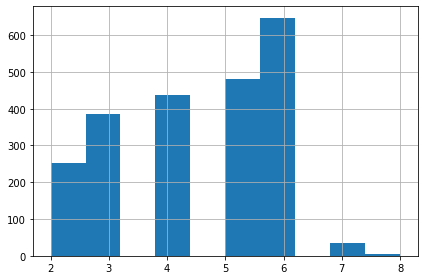

In [ ]:
#To plot histogram of data with Na⁺ only according to their number of bound residues
dfNa['Number of all bound residues'].hist()
plt.savefig("output.jpg")

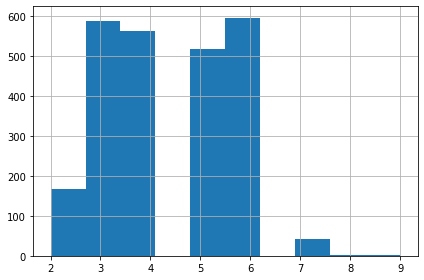

In [ ]:
Metal_PDB_df.loc[Metal_PDB_df['Ion'] =='Mg²⁺']['Number of all bound residues'].hist()

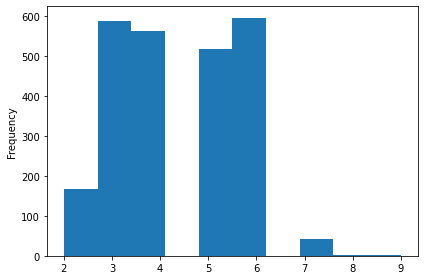

In [ ]:
Metal_PDB_df.loc[Metal_PDB_df['Ion'] =='Mg²⁺']['Number of all bound residues'].plot(x = 'Representative', y = 'Number of all bound residues', kind = 'hist')


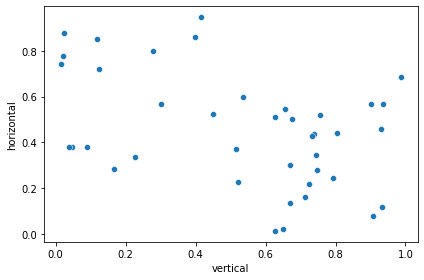

In [183]:
#To plot Ion against organisms
Metal_PDB_df = pd.read_csv('/Sam_DrewDrive/MyDrive/metals only.csv')

#creating sample data 
Metal_data={'vertical':np.random.rand(40),
      'horizontal': np.random.rand(40)}
df= pd.DataFrame(Metal_data)
sns.scatterplot(x="vertical", y="horizontal", data=df)

Text(0.5, 1.0, 'Comparison of Unique Proteins in EDTA controland experiment\n')

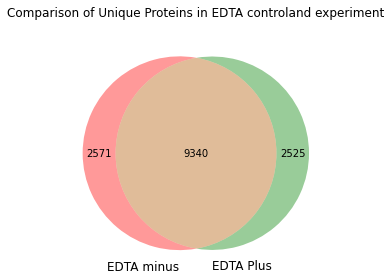

In [184]:
#Plot venn diagram with ETDA plus and Minus
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
EDTA_minus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv')
EDTA_plus_df = pd.read_csv ('/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
venn2([set(EDTA_minus_df['Entry name'].to_list()),
       set(EDTA_plus_df['Entry name'].to_list()),],
       set_labels=('EDTA minus', 'EDTA Plus')
     )
plt.title('Comparison of Unique Proteins in EDTA controland experiment\n')

In [ ]:
#sfisch6: Cool, we can see some big differences in our data set... but now we have to properly defin what a captured protein is
##  in order to be considered a protein, let's say that you need to have at least 10 PSMs in a row


In [ ]:
EDTA_plus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EDTA_plus_Table_df = EDTA_plus_df[["Entry name"]]

In [ ]:
EDTA_plus_Table_df

,Entry name
0,NUD4B_HUMAN
1,TVBY1_HUMAN
2,KVD17_HUMAN
3,TVA6_HUMAN
4,TVA30_HUMAN
...,...
11862,MORC2_HUMAN
11863,NS1BP_HUMAN
11864,CMTA1_HUMAN
11865,S23IP_HUMAN


In [ ]:
len(plus_above_50)

1752

In [ ]:
EDTA_plus_Table_df

,Entry name
0,NUD4B_HUMAN
1,TVBY1_HUMAN
2,KVD17_HUMAN
3,TVA6_HUMAN
4,TVA30_HUMAN
...,...
11862,MORC2_HUMAN
11863,NS1BP_HUMAN
11864,CMTA1_HUMAN
11865,S23IP_HUMAN


In [ ]:
#Save the new data as of EDTA plus above 50 to csv
plus_above_50.to_csv('/EDTAPlus_trimmed.csv')

In [ ]:
#Save the new data as of EDTA minus above 50 to csv
minus_above_50.to_csv('/EDTAMinus_trimmed.csv')

In [ ]:
(~minus_above_50.isin(plus_above_50))

,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,HEK293_EDTA_minus_SEC_control_21a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
17,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
70,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
74,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
152,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
328,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11860,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11873,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11877,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11908,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
EDTA_minus_df[(~EDTA_minus_df.isin(plus_above_50))]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
EDTA_minus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Checking only Entry name
EDTA_minus_df['Entry name']

0        NUD4B_HUMAN
1        LV460_HUMAN
2        LVX54_HUMAN
3        HV364_HUMAN
4        KVD17_HUMAN
            ...     
11908    S23IP_HUMAN
11909    COL10_HUMAN
11910    A3LT2_HUMAN
11911    SACA6_HUMAN
11912            NaN
Name: Entry name, Length: 11913, dtype: object

In [ ]:
#Checking only Entry name
plus_above_50 = EDTA_plus_df[EDTA_plus_df.sum(axis=1)>=50]
minus_above_50 = EDTA_minus_df[EDTA_minus_df.sum(axis=1)>=50]
plus_above_50['Entry name']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


0        NUD4B_HUMAN
1        TVBY1_HUMAN
2        KVD17_HUMAN
3         TVA6_HUMAN
4        TVA30_HUMAN
            ...     
11862    MORC2_HUMAN
11863    NS1BP_HUMAN
11864    CMTA1_HUMAN
11865    S23IP_HUMAN
11866            NaN
Name: Entry name, Length: 11867, dtype: object

In [ ]:
#Number of overlap using entry name
EDTA_minus_df['Entry name'].isin(plus_above_50['Entry name']).sum()

9342

In [ ]:
plus_above_50

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#It is looking for every row in the two data
EDTA_minus_df.isin(plus_above_50)

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11909,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
EDTA_minus_df[(~plus_above_50.isin(EDTA_minus_df))]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A075B6I1,LV460_HUMAN,NaN,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,NaN,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A075B6I4,LVX54_HUMAN,NaN,Immunoglobulin lambda variable 10-54,IGLV10-54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A075B6Q5,HV364_HUMAN,NaN,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A075B6S4,KVD17_HUMAN,NaN,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,NaN,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#This is used to find the the COMMON complexes in ETDA control and experiment for 50 PSMs and above using Gene names irrecpective of the row
minus_above_50[minus_above_50['Entry name'].isin(plus_above_50['Entry name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
5,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
7,A0A087WUL8,NBPFJ_HUMAN,reviewed,Neuroblastoma breakpoint family member 19,NBPF19,3843.0,2 out of 5,NaN,cytoplasm [GO:0005737],NaN,...,0,0,0,0,0,0,0,0,0,0
9,A0A096LP49,CC187_HUMAN,reviewed,Coiled-coil domain-containing protein 187,CCDC187,1063.0,2 out of 5,microtubule anchoring [GO:0034453],centrosome [GO:0005813],microtubule binding [GO:0008017],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11906,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11907,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,0,0,0,0
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#This is used to find the the complexes that are in EDTA_Minus but not in the EDTA_plus as defined using Gene names irrecpective of the row
EDTA_minus_df[~EDTA_minus_df['Entry name'].isin(EDTA_plus_df['Entry name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
6,A0A075B6U4,TVA7_HUMAN,reviewed,T cell receptor alpha variable 7,TRAV7,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
8,A0A096LP01,SIM26_HUMAN,reviewed,Small integral membrane protein 26,SMIM26,95.0,1 out of 5,NaN,integral component of membrane [GO:0016021],NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,Q9Y6W6,DUS10_HUMAN,reviewed,Dual specificity protein phosphatase 10 (EC 3....,DUSP10 MKP5,482.0,5 out of 5,dephosphorylation [GO:0016311]; inactivation o...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,JUN kinase binding [GO:0008432]; MAP kinase ph...,...,0,0,0,0,0,0,0,0,0,0
11898,Q9Y6W8,ICOS_HUMAN,reviewed,Inducible T-cell costimulator (Activation-indu...,ICOS AILIM,199.0,5 out of 5,cell-cell adhesion [GO:0098609]; immune respon...,extracellular region [GO:0005576]; integral co...,NaN,...,0,0,0,0,0,0,0,0,0,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the complexes that are in EDTA_Plus but not in the EDTA_Minus as defined using Gene names irrecpective of the row
EDTA_plus_df[~EDTA_plus_df['Entry name'].isin(EDTA_minus_df['Entry name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
6,A0A087X0K7,TVB17_HUMAN,reviewed,Probable non-functional T cell receptor beta v...,TRBV17,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
7,A0A087X0M5,TVB18_HUMAN,reviewed,T cell receptor beta variable 18,TRBV18,115.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
8,A0A087X1C5,CP2D7_HUMAN,reviewed,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,515.0,5 out of 5,arachidonic acid metabolic process [GO:0019369...,cytoplasm [GO:0005737]; integral component of ...,aromatase activity [GO:0070330]; heme binding ...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,Q9Y6N8,CAD10_HUMAN,reviewed,Cadherin-10 (T2-cadherin),CDH10,788.0,5 out of 5,adherens junction organization [GO:0034332]; c...,adherens junction [GO:0005912]; catenin comple...,cadherin binding [GO:0045296]; calcium ion bin...,...,0,0,0,0,0,0,0,0,0,0
11840,Q9Y6P5,SESN1_HUMAN,reviewed,Sestrin-1 (EC 1.11.1.-) (p53-regulated protein...,SESN1 PA26 SEST1,492.0,5 out of 5,cellular oxidant detoxification [GO:0098869]; ...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,leucine binding [GO:0070728]; oxidoreductase a...,...,0,0,0,0,0,0,0,0,0,1
11841,Q9Y6Q1,CAN6_HUMAN,reviewed,Calpain-6 (Calpain-like protease X-linked) (Ca...,CAPN6 CALPM CANPX,641.0,5 out of 5,microtubule bundle formation [GO:0001578]; reg...,cytoplasm [GO:0005737]; perinuclear region of ...,calcium-dependent cysteine-type endopeptidase ...,...,0,0,0,0,0,0,0,0,0,0
11842,Q9Y6Q2,STON1_HUMAN,reviewed,Stonin-1 (Stoned B-like factor),STON1 SALF SBLF STN1,735.0,5 out of 5,regulation of endocytosis [GO:0030100]; synapt...,clathrin-coated vesicle [GO:0030136]; cytoplas...,clathrin adaptor activity [GO:0035615],...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the unique complexes with rows above 50 PSMs that are in EDTA_Plus but not in the EDTA_Minus as defined using Gene names irrecpective of the row
plus_above_50[~plus_above_50['Entry name'].isin(minus_above_50['Entry name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
6,A0A087X0K7,TVB17_HUMAN,reviewed,Probable non-functional T cell receptor beta v...,TRBV17,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
7,A0A087X0M5,TVB18_HUMAN,reviewed,T cell receptor beta variable 18,TRBV18,115.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
8,A0A087X1C5,CP2D7_HUMAN,reviewed,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,515.0,5 out of 5,arachidonic acid metabolic process [GO:0019369...,cytoplasm [GO:0005737]; integral component of ...,aromatase activity [GO:0070330]; heme binding ...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,Q9Y6N8,CAD10_HUMAN,reviewed,Cadherin-10 (T2-cadherin),CDH10,788.0,5 out of 5,adherens junction organization [GO:0034332]; c...,adherens junction [GO:0005912]; catenin comple...,cadherin binding [GO:0045296]; calcium ion bin...,...,0,0,0,0,0,0,0,0,0,0
11840,Q9Y6P5,SESN1_HUMAN,reviewed,Sestrin-1 (EC 1.11.1.-) (p53-regulated protein...,SESN1 PA26 SEST1,492.0,5 out of 5,cellular oxidant detoxification [GO:0098869]; ...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,leucine binding [GO:0070728]; oxidoreductase a...,...,0,0,0,0,0,0,0,0,0,1
11841,Q9Y6Q1,CAN6_HUMAN,reviewed,Calpain-6 (Calpain-like protease X-linked) (Ca...,CAPN6 CALPM CANPX,641.0,5 out of 5,microtubule bundle formation [GO:0001578]; reg...,cytoplasm [GO:0005737]; perinuclear region of ...,calcium-dependent cysteine-type endopeptidase ...,...,0,0,0,0,0,0,0,0,0,0
11842,Q9Y6Q2,STON1_HUMAN,reviewed,Stonin-1 (Stoned B-like factor),STON1 SALF SBLF STN1,735.0,5 out of 5,regulation of endocytosis [GO:0030100]; synapt...,clathrin-coated vesicle [GO:0030136]; cytoplas...,clathrin adaptor activity [GO:0035615],...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the unique complexes with rows above 50 PSMs that are in EDTA_Minus but not in the EDTA_Plus as defined using Gene names irrecpective of the row
minus_above_50[~minus_above_50['Entry name'].isin(plus_above_50['Entry name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
6,A0A075B6U4,TVA7_HUMAN,reviewed,T cell receptor alpha variable 7,TRAV7,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
8,A0A096LP01,SIM26_HUMAN,reviewed,Small integral membrane protein 26,SMIM26,95.0,1 out of 5,NaN,integral component of membrane [GO:0016021],NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,Q9Y6W6,DUS10_HUMAN,reviewed,Dual specificity protein phosphatase 10 (EC 3....,DUSP10 MKP5,482.0,5 out of 5,dephosphorylation [GO:0016311]; inactivation o...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,JUN kinase binding [GO:0008432]; MAP kinase ph...,...,0,0,0,0,0,0,0,0,0,0
11898,Q9Y6W8,ICOS_HUMAN,reviewed,Inducible T-cell costimulator (Activation-indu...,ICOS AILIM,199.0,5 out of 5,cell-cell adhesion [GO:0098609]; immune respon...,extracellular region [GO:0005576]; integral co...,NaN,...,0,0,0,0,0,0,0,0,0,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the complexes that are in EDTA_Plus but not in the Intermetal DB as defined using Gene names irrecpective of the row
HumanProtein_file = "/Sam_DrewDrive/MyDrive/Human_Protein.csv"
dataset = pd.read_csv(HumanProtein_file)
HP_df = pd.DataFrame(dataset)
HP_df[HP_df['Entry Name'].isin(EDTA_plus_df['Entry name'])]

,PDB ID,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Interacts with
0,3P1O,P31947,reviewed,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,SFN HME1,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
1,4DHQ,P31947,reviewed,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,SFN HME1,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
2,4DHR,P31947,reviewed,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,SFN HME1,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
3,4DHU,P31947,reviewed,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,SFN HME1,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
4,6FAV,P31947,reviewed,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,SFN HME1,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
...,...,...,...,...,...,...,...,...,...
2492,3SOU,Q96T88,reviewed,UHRF1_HUMAN,E3 ubiquitin-protein ligase UHRF1 (EC 2.3.2.27...,UHRF1 ICBP90 NP95 RNF106,Homo sapiens (Human),793,P26358; Q9Y6K1; Q9UBC3
2496,2H32,P12018,reviewed,VPREB_HUMAN,Immunoglobulin iota chain (CD179 antigen-like ...,VPREB1 VPREB,Homo sapiens (Human),145,NaN
2497,3VHS,Q96S55,reviewed,WRIP1_HUMAN,ATPase WRNIP1 (EC 3.6.1.-) (Werner helicase-in...,WRNIP1 WHIP,Homo sapiens (Human),665,O95786; P28340; P49005; Q9HCU8; Q9H0E2; Q96S55
2498,5KL2,P19544,reviewed,WT1_HUMAN,Wilms tumor protein (WT33),WT1,Homo sapiens (Human),449,Q92997; Q6A162; P60410; Q6N021; P05067; O14503...


In [ ]:
plus_above_50

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [185]:
Human_metal_df = pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB.csv')
# class v / s fare barplot
Human_metal_df

,Id,Unique Proteins,Unnamed: 2,UniProt Entry Name,Metals,Metals in proteins,Occurrence of metals,EDTA Plus,EDTA Minus,Location,...,Residues,Classification,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly
0,4WOL,1BPX,NaN,TYOBP_HUMAN,K,Ca,36.0,No,Yes,CORE,...,ASP,SIGNALING PROTEIN,"alpha-helix transmembrane signalling, SIGNALIN...",10/16/2014,1.77,0.18330,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0
1,4WFE,1ETE,NaN,KCNK4_HUMAN,K,Cd,3.0,Yes,Yes,CORE,...,LYS,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
2,4WFE,1EXZ,NaN,KCNK4_HUMAN,K,K,22.0,Yes,Yes,CORE,...,K,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
3,4WFE,1FE0,NaN,KCNK4_HUMAN,K,Mg,13.0,Yes,Yes,CORE,...,K,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
4,4WFE,1KCQ,NaN,KCNK4_HUMAN,Ca,Mn,12.0,Yes,Yes,SURFACE,...,GLU,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Only Human Protein with metal at surface 
Human_Protein_df = pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB.csv')
Human_Location_SURFACE=Human_Protein_df[Human_Protein_df['Location']=='SURFACE']

In [ ]:
Human_Location_SURFACE

,Id,Unique Proteins,Unnamed: 2,UniProt Entry Name,Metals,Metals in proteins,Occurrence of metals,EDTA Plus,EDTA Minus,Location,...,Residues,Classification,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly
4,4WFE,1KCQ,NaN,KCNK4_HUMAN,Ca,Mn,12.0,Yes,Yes,SURFACE,...,GLU,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
5,4WFE,1X9D,NaN,KCNK4_HUMAN,Ca,Na,20.0,Yes,Yes,SURFACE,...,SER,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
7,4WFE,2A0Q,NaN,KCNK4_HUMAN,Ca,NaN,NaN,Yes,Yes,SURFACE,...,GLY,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
12,5KG6,2RIC,NaN,POLH_HUMAN,Mn,NaN,NaN,Yes,No,SURFACE,...,ASP,"replication, transferase/dna","in crystallo reaction, DNA polymerase, metal i...",6/12/2016,1.55,0.19220,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0
13,5KG6,3P5G,NaN,POLH_HUMAN,Mn,NaN,NaN,Yes,No,SURFACE,...,DPO,"replication, transferase/dna","in crystallo reaction, DNA polymerase, metal i...",6/12/2016,1.55,0.19220,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,6V38,NaN,NaN,KCMA1_HUMAN,Ca,NaN,NaN,Yes,KCMA1_HUMAN,SURFACE,...,GLN,TRANSPORT PROTEIN,"High conductance Ca2+-activated K+ channel, Sl...",11/25/2019,NaN,NaN,Homo sapiens,Homo sapiens,ELECTRON MICROSCOPY,1.0
128,7L67,NaN,NaN,MRC1_HUMAN,Ca,NaN,NaN,Yes,Yes,SURFACE,...,ASN,SUGAR BINDING PROTEIN,"GLYCOBIOLOGY, CARBOHYDRATE-BINDING PROTEIN, C-...",12/23/2020,1.20,0.14850,Homo sapiens,Escherichia coli BL21(DE3),X-RAY DIFFRACTION,1.0
129,3P5G,NaN,NaN,CLC4K_HUMAN,Ca,NaN,NaN,Yes,Yes,SURFACE,...,ASN,SUGAR BINDING PROTEIN,"C-type lectin, carbohydrate-binding, SUGAR BIN...",10/8/2010,1.60,0.17900,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0
130,1KCQ,NaN,NaN,GELS_HUMAN,Cd,NaN,NaN,Yes,Yes,SURFACE,...,HIS,STRUCTURAL PROTEIN,"alpha-beta structure, actin-binding protein, f...",11/9/2001,1.65,0.17700,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,2.0


In [ ]:
#Only Human Protein with metal at CORE 
Human_Protein_df = pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Human_Location_CORE=Human_Protein_df[Human_Protein_df['Location']=='CORE']

In [ ]:
#Only Human Protein with metal at SURFACE
Human_Protein_df = pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Human_Location_SURFACE=Human_Protein_df[Human_Protein_df['Location']=='SURFACE']

In [ ]:
#Only Human Protein with metal at SURFACE
Human_Protein_df = pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Human_Location_Interface=Human_Protein_df[Human_Protein_df['Location']=='Interface']

In [ ]:
#Count the number of each metals in TOTAL
CORE_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv', index_col=0)
CORE_df['Metals'].value_counts()

Ca    42
Zn    40
Na    22
K     20
Mg    15
Mn    13
Cd     5
Cu     1
Name: Metals, dtype: int64

In [ ]:
#Count the number of each metals at the SURFACE
SURFACE_df= pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB.csv', index_col=0)
Human_Location_SURFACE['Metals'].value_counts()

Ca    36
Zn    32
Na    12
Mn     8
Mg     5
K      4
Cd     4
Name: Metals, dtype: int64

In [ ]:
#Count the number of each metals at the CORE
SURFACE_df= pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB.csv', index_col=0)
Human_Location_CORE['Metals'].value_counts(ascending=False)

Na    9
K     7
Mg    7
Mn    5
Ca    4
Zn    3
Cu    1
Name: Metals, dtype: int64

In [ ]:
#Count the number of each metals at the Interface
SURFACE_df= pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB.csv', index_col=0)
Human_Location_Interface['Metals'].value_counts(ascending=False)

K     9
Zn    5
Mg    3
Ca    2
Na    1
Cd    1
Name: Metals, dtype: int64

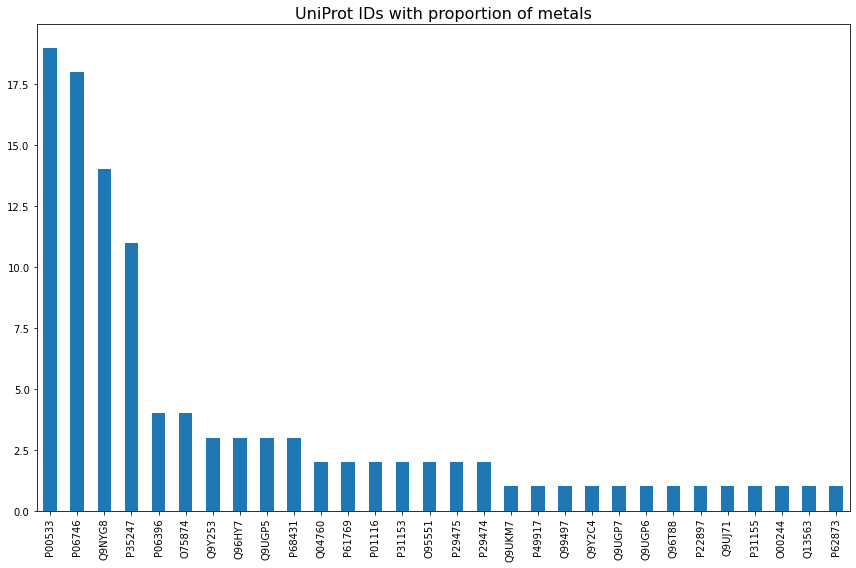

In [ ]:
#Just to count the protein complexes with the highest metals Count using UniProt IDs
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
Metals_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Metals_df['Entry name'].value_counts()
Metals_df['Entry name'].value_counts().plot(kind='bar')
plt.title('UniProt IDs with proportion of metals', fontsize=16)
plt.savefig("/Sam_DrewDrive/MyDrive/Proteins_Metal-ion_Profile.pdf")

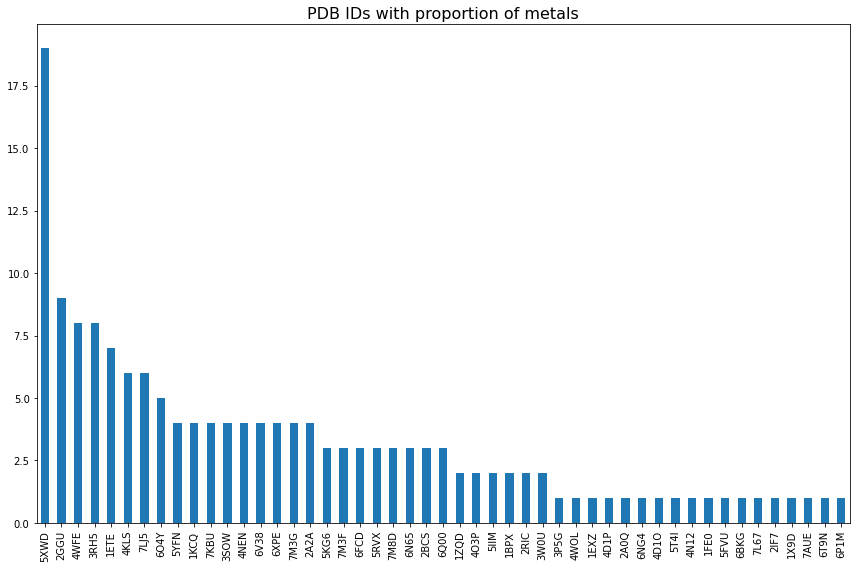

In [ ]:
#Just to count the protein complexes with the highest metals Count using PDB IDs
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
Metals_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Metals_df['Id'].value_counts()
Metals_df['Id'].value_counts().plot(kind='bar')
plt.title('PDB IDs with proportion of metals', fontsize=16)
plt.savefig("/Sam_DrewDrive/MyDrive/Proteins_Metal-ion_PDB.pdf")

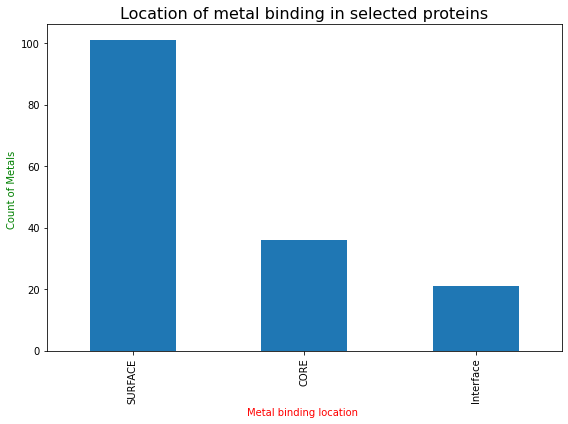

In [ ]:
#To check metal ion binding site on selected proteins
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
Metals_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
Metals_df['Location'].value_counts()
Metals_df['Location'].value_counts().plot(kind='bar')
plt.ylabel('Count of Metals ', color = "g")
plt.xlabel('Metal binding location ', color = "r")
plt.title('Location of metal binding in selected proteins', fontsize=16)
plt.savefig("/Sam_DrewDrive/MyDrive/Metal-binding Location.pdf")

In [ ]:
len(Metals_df)

494

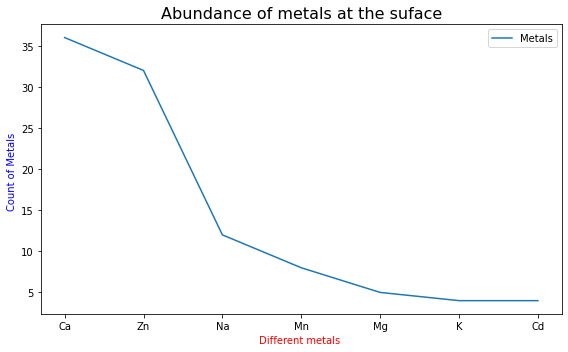

In [ ]:
#Plotting line graph for metals at the surface
, legend
#Plotting two line graphs together
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1)
# plot first pandas frame in subplot style
Human_Location_SURFACE['Metals'].value_counts().plot()
# plot second pandas frame in subplot style
plt.ylabel('Count of Metals ', color = "b")
plt.xlabel('Different metals ', color = "r")
plt.title('Abundance of metals at the suface', fontsize=16)
plt.legend()
plt.savefig("/Sam_DrewDrive/MyDrive/Metals_at_the_SURFACE.pdf")

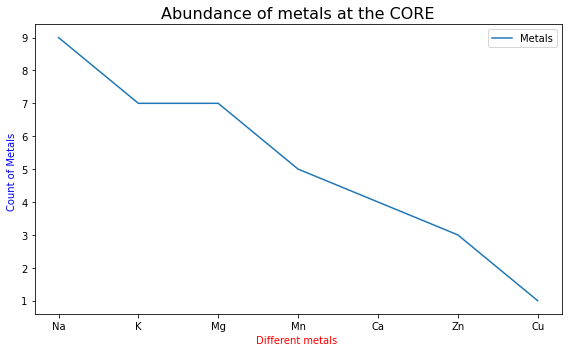

In [ ]:
#Plotting line graph for metals at the CORE
, legend
#Plotting two line graphs together
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1)
# plot first pandas frame in subplot style
Human_Location_CORE['Metals'].value_counts().plot()
# plot second pandas frame in subplot style
plt.ylabel('Count of Metals ', color = "b")
plt.xlabel('Different metals ', color = "r")
plt.title('Abundance of metals at the CORE', fontsize=16)
plt.legend()
plt.savefig("/Sam_DrewDrive/MyDrive/Metals_at_the_CORE.pdf")

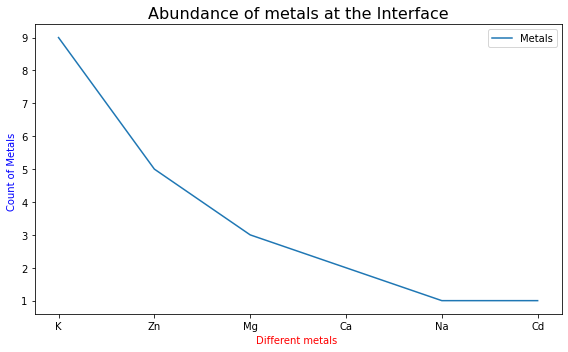

In [ ]:
#Plotting line graph for metals at the Interface
, legend
#Plotting two line graphs together
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1)
# plot first pandas frame in subplot style
Human_Location_Interface['Metals'].value_counts().plot()
# plot second pandas frame in subplot style
plt.ylabel('Count of Metals ', color = "b")
plt.xlabel('Different metals ', color = "r")
plt.title('Abundance of metals at the Interface', fontsize=16)
plt.legend()
plt.savefig("/Sam_DrewDrive/MyDrive/Metals_at_the_Interface.pdf")

In [ ]:
Human_Location_SURFACE

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0
11,4D1P,P29474,NOS3_HUMAN,Zn,Yes,Yes,SURFACE,1.0,900.0,CYS,...,"OXIDOREDUCTASE, NITRIC OXIDE SYNTHASE",5/2/2014,1.73,0.15660,HOMO SAPIENS,ESCHERICHIA COLI,X-RAY DIFFRACTION,1.0,NaN,NaN
14,2BCS,Q9UGP5,DPOLL_HUMAN,Na,Yes,Yes,SURFACE,NaN,620.0,SER,...,"misalignment, extrahelical, mutagenesis, mutat...",10/19/2005,2.20,0.20700,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
15,2BCS,Q9UGP6,DPOLL_HUMAN,Na,Yes,Yes,SURFACE,NaN,600.0,SER,...,"misalignment, extrahelical, mutagenesis, mutat...",10/19/2005,2.20,0.20700,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2A0Q,NaN,THRB_HUMAN,K,No,No,SURFACE,NaN,403.0,ARG,...,"serine protease, HYDROLASE",6/16/2005,1.90,0.19500,Homo sapiens,Cricetulus griseus,X-RAY DIFFRACTION,3.0,NaN,NaN
149,6O4Y,NaN,A0A140T913_HUMAN,Na,No,No,SURFACE,NaN,302.0,ASP,...,"MHC class 1 molecule, antigen presentation, pe...",3/1/2019,1.58,0.17930,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
151,2A2A,NaN,DAPK2_HUMAN,Na,No,No,SURFACE,NaN,3152.0,ASN,...,"protein kinase, autoinhibition, Transferase",6/22/2005,1.47,0.14959,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
152,2A2A,NaN,DAPK2_HUMAN,Na,No,No,SURFACE,NaN,3178.0,LEU,...,"protein kinase, autoinhibition, Transferase",6/22/2005,1.47,0.14959,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN


In [ ]:
Human_Location_CORE

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
7,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,CORE,NaN,302.0,THR,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Zn,40.0
8,6FCD,P31153,METK2_HUMAN,Mg,Yes,Yes,CORE,NaN,401.0,PPV,...,TRANSFERASE,12/20/2017,1.700,0.15997,Homo sapiens,Escherichia coli BL21(DE3),X-RAY DIFFRACTION,1.0,NaN,NaN
9,6FCD,P31153,METK2_HUMAN,K,Yes,Yes,CORE,NaN,403.0,ALA,...,TRANSFERASE,12/20/2017,1.700,0.15997,Homo sapiens,Escherichia coli BL21(DE3),X-RAY DIFFRACTION,1.0,NaN,NaN
10,6FCD,P31155,METK2_HUMAN,Mg,Yes,Yes,CORE,NaN,402.0,PPV,...,TRANSFERASE,12/20/2017,1.700,0.15997,Homo sapiens,Escherichia coli BL21(DE3),X-RAY DIFFRACTION,1.0,NaN,NaN
16,2BCS,Q9UGP7,DPOLL_HUMAN,Mg,Yes,Yes,CORE,NaN,900.0,ASP,...,"misalignment, extrahelical, mutagenesis, mutat...",10/19/2005,2.200,0.20700,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
17,5T4I,Q9Y2C4,EXOG_HUMAN,Mn,Yes,Yes,CORE,NaN,401.0,OP1,...,"mitochondria, exonuclease, DNA-repair, complex...",8/29/2016,2.389,0.19050,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
37,4N12,Q99497,PARK7_HUMAN,Cu,Yes,Yes,CORE,1.0,201.0,GLU,...,"Alpha/beta structure, chaperone, oxidative str...",10/3/2013,1.478,0.16390,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
40,1X9D,Q9UKM7,MA1B1_HUMAN,Ca,Yes,Yes,CORE,1.0,1001.0,THR,...,"mannosidase, substrate analogue, glycosyl hydr...",8/20/2004,1.410,0.14400,Homo sapiens,Pichia pastoris,X-RAY DIFFRACTION,1.0,NaN,NaN
43,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,CORE,3.0,401.0,GLC,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.850,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
56,3RH5,P06746,DPOLB_HUMAN,Na,Yes,Yes,CORE,NaN,346.0,THR,...,"DNA Polymerase Beta mutant, nucleotide transfe...",4/11/2011,2.096,0.20840,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN


In [ ]:
Human_Location_Interface

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
0,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,LYS,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cu,1.0
1,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Ca,42.0
2,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,303.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cd,5.0
5,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,307.0,GLY,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mn,13.0
6,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,Interface,NaN,306.0,GLY,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Na,22.0
12,6NG4,P29475,NOS1_HUMAN,Zn,Yes,Yes,Interface,2.0,803.0,CYS,...,"nitric oxide synthase, inhibitor complex, heme...",12/21/2018,1.776,0.17780,Homo sapiens,Escherichia coli BL21(DE3),X-RAY DIFFRACTION,1.0,NaN,NaN
13,4D1O,P29474,NOS3_HUMAN,Zn,Yes,Yes,Interface,2.0,900.0,CYS,...,"OXIDOREDUCTASE, NITRIC OXIDE SYNTHASE",5/2/2014,1.820,0.15480,HOMO SAPIENS,ESCHERICHIA COLI,X-RAY DIFFRACTION,1.0,NaN,NaN
38,5FVU,P29475,NOS1_HUMAN,Zn,Yes,Yes,Interface,2.0,900.0,CYS,...,"OXIDOREDUCTASE, NITRIC OXIDE SYNTHASE",2/10/2016,2.220,0.17680,HOMO SAPIENS,ESCHERICHIA COLI,X-RAY DIFFRACTION,1.0,NaN,NaN
64,5YFN,O75874,IDHC_HUMAN,K,Yes,Yes,Interface,2.0,501.0,NaN,...,"IDH1, isocitrate, NADPH regeneration, CYTOSOLI...",9/21/2017,2.500,0.17300,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
65,5YFN,O75874,IDHC_HUMAN,K,Yes,Yes,Interface,2.0,504.0,NaN,...,"IDH1, isocitrate, NADPH regeneration, CYTOSOLI...",9/21/2017,2.500,0.17300,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN


In [ ]:
EDTA_plus = Human_Protein_df[Human_Protein_df['Metals'] == 'Ca']

In [ ]:
EDTA_plus

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0
6,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,Interface,NaN,306.0,GLY,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Na,22.0
40,1X9D,Q9UKM7,MA1B1_HUMAN,Ca,Yes,Yes,CORE,1.0,1001.0,THR,...,"mannosidase, substrate analogue, glycosyl hydr...",8/20/2004,1.41,0.14400,Homo sapiens,Pichia pastoris,X-RAY DIFFRACTION,1.0,NaN,NaN
41,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,3.0,403.0,ASP,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
42,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,3.0,402.0,ASP,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
43,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,CORE,3.0,401.0,GLC,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
44,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,3.0,403.0,ASP,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
45,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,3.0,402.0,ASP,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN
46,2GGU,P35247,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,3.0,401.0,GLC,...,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.85,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0,NaN,NaN


In [ ]:
#How do I plot a bar chart showing all the metals proportion in percentage in my datatset


In [186]:
Residues_df = pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB (6).csv')


In [ ]:
#Extract only data for Residues coordinating 10 or more metals
Residues_new =Residues_df[Residues_df['Count of Residues'] >= 10]

In [ ]:
Residues_new

,Id,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Position,Residue name,Count of Residues,Classification,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly
3,4WFE,KCNK4_HUMAN,K,Yes,Yes,CORE,303.0,ASP,49.0,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1
6,4WFE,KCNK4_HUMAN,K,Yes,Yes,CORE,307.0,CYS,10.0,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.500,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1
25,1ETE,FLT3L_HUMAN,Zn,No,No,SURFACE,1137.0,GLU,38.0,CYTOKINE,"four-helix bundle, CYTOKINE",4/12/2000,2.200,0.23900,Homo sapiens,Bacteria,X-RAY DIFFRACTION,3
26,1ETE,FLT3L_HUMAN,Zn,No,No,SURFACE,1136.0,GLY,11.0,CYTOKINE,"four-helix bundle, CYTOKINE",4/12/2000,2.200,0.23900,Homo sapiens,Bacteria,X-RAY DIFFRACTION,3
28,2BCS,DPOLL_HUMAN,Na,Yes,Yes,SURFACE,620.0,HIS,19.0,"Transferase, Lyase/DNA","misalignment, extrahelical, mutagenesis, mutat...",10/19/2005,2.200,0.20700,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1
31,5T4I,EXOG_HUMAN,Mn,Yes,Yes,CORE,401.0,ILE,12.0,HYDROLASE/DNA,"mitochondria, exonuclease, DNA-repair, complex...",8/29/2016,2.389,0.19050,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1
33,5XWD,EGFR_HUMAN,Zn,Yes,Yes,SURFACE,201.0,LEU,11.0,SIGNALING PROTEIN,"Antibody, Receptor, Complex, SIGNALING PROTEIN",6/29/2017,2.894,0.27680,Homo sapiens,Homo sapiens,X-RAY DIFFRACTION,1
44,5FVU,NOS1_HUMAN,Zn,Yes,Yes,SURFACE,900.0,SER,17.0,OXIDOREDUCTASE,"OXIDOREDUCTASE, NITRIC OXIDE SYNTHASE",2/10/2016,2.220,0.17680,HOMO SAPIENS,ESCHERICHIA COLI,X-RAY DIFFRACTION,1
45,6BKG,DNLI4_HUMAN,Na,Yes,Yes,SURFACE,703.0,THR,15.0,LIGASE/DNA,"DNA double-strand break repair, ligase, nonhom...",11/8/2017,2.400,0.20140,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1
48,2GGU,SFTPD_HUMAN,Ca,Yes,Yes,SURFACE,402.0,VAL,10.0,SUGAR BINDING PROTEIN,"protein-carbohydrate ligand complex, SUGAR BIN...",3/24/2006,1.850,0.22100,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1


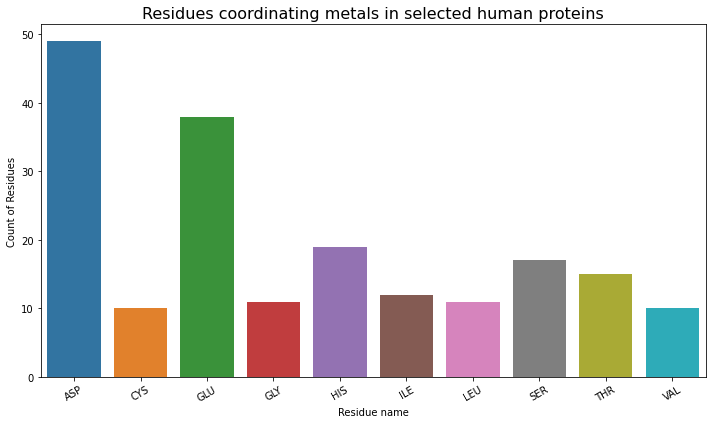

In [ ]:
#Plot a graph to show highest number or residues coordinating the metals (This is for both surface and core)
#Always define the dimension of the bar chart before defining the plot
plt.figure(figsize=(10,6))
sns.barplot(x = 'Residue name', y = 'Count of Residues', data = Residues_new)
plt.title('Residues coordinating metals in selected human proteins', fontsize=16)
# and rotate the horizontal label
plt.xticks(rotation=30, horizontalalignment="center")
# Show the plot
plt.savefig("/Sam_DrewDrive/MyDrive/Metal_Residue1.pdf")

In [ ]:

plt.savefig("/Sam_DrewDrive/MyDrive/Metal_Residue.pdf")

<Figure size 576x360 with 0 Axes>

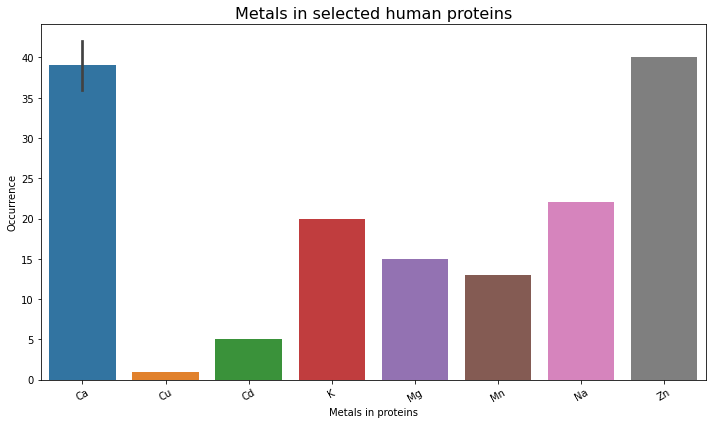

In [178]:
#Plotting for metals found in various proteins and saving as pdf
import pandas as pd
Metals_df = pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Metals in proteins', y = 'Occurrence', data = Metals_df)
plt.title('Metals in selected human proteins', fontsize=16)
# and rotate the horizontal label
plt.xticks(rotation=30, horizontalalignment="center")
# Show the plot
plt.savefig("/Sam_DrewDrive/MyDrive/Metals.pdf")

In [ ]:
# Total number of Metals
total_Metal = Metals_df['Occurrence'].sum()
print('Total number of metals: %s' % total_Metal)

Total number of metals: 149.0


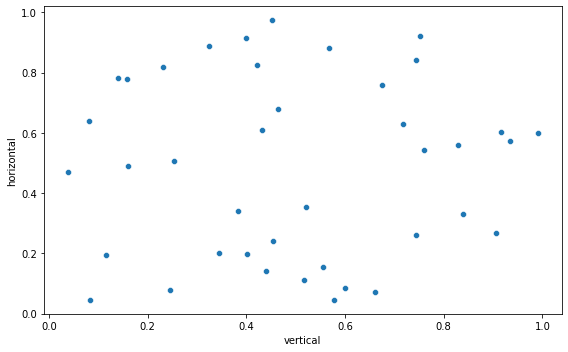

In [ ]:
EDTA_plus_Table={'vertical':np.random.rand(40),
      'horizontal': np.random.rand(40)}
df= pd.DataFrame(EDTA_plus_Table)
sns.scatterplot(x="vertical", y="horizontal", data=df)

In [ ]:
EDTA_minus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
EDTA_plus_df.head()

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
EDTA_minus_Num_df = pd.read_csv('/Sam_DrewDrive/MyDrive/EDTA_minus_Num.csv')
EDTA_plus_Num_df = pd.read_csv('/Sam_DrewDrive/MyDrive/EDTA_plus_Num.csv')

In [ ]:
EDTA_minus_Num_df

,Unnamed: 0,rowSum,order_pearson_average,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,5.0,10416.0,0,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,1.0,3096.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,1.0,1360.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,1.0,11208.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,2.0,11766.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,66.0,2867.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,2.0,8459.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,1.0,2982.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,2.0,3775.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
import csv
Human_metal = pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB (4).csv')

In [ ]:
Human_metal

,Id,Unique Proteins,Unnamed: 2,UniProt Entry Name,Metals,Metals in proteins,Occurrence,EDTA Plus,EDTA Minus,Location,...,Residues,Classification,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly
0,4WOL,1BPX,NaN,TYOBP_HUMAN,K,Ca,42.0,No,Yes,CORE,...,ASP,SIGNALING PROTEIN,"alpha-helix transmembrane signalling, SIGNALIN...",10/16/2014,1.77,0.18330,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.0
1,4WFE,1ETE,NaN,KCNK4_HUMAN,K,Cd,5.0,Yes,Yes,CORE,...,LYS,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
2,4WFE,1EXZ,NaN,KCNK4_HUMAN,K,K,20.0,Yes,Yes,CORE,...,K,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
3,4WFE,1FE0,NaN,KCNK4_HUMAN,K,Mg,15.0,Yes,Yes,CORE,...,K,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
4,4WFE,1KCQ,NaN,KCNK4_HUMAN,Ca,Mn,13.0,Yes,Yes,SURFACE,...,GLU,METAL TRANSPORT,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.50,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
EDTA_min_df = pd.read_csv('/Sam_DrewDrive/MyDrive/EDTA_min.csv')
EDTA_plu_df = pd.read_csv('/Sam_DrewDrive/MyDrive/EDTA_plu.csv')

In [ ]:
EDTA_plu_df

,Unnamed: 0,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#To convert all organisms to list
Checking_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Direct from intermetal DB.csv')
# converting column data to list
Organisms = Checking_df['Organism'].tolist()
# printing list data
print(Organisms)

['Escherichia coli', 'Meiothermus ruber H328', 'Erwinia chrysanthemi', 'Enterobacteria phage T4', 'Emericella nidulans', 'Lactobacillus reuteri', 'Lactobacillus reuteri', 'Xylella fastidiosa', 'Chlorobium tepidum TLS', 'Ralstonia eutropha JMP134', 'Escherichia coli', 'Shewanella oneidensis', 'Escherichia coli', 'Arabidopsis thaliana', 'Nostoc sp.', 'Physarum polycephalum', 'Saccharomyces cerevisiae', 'Escherichia coli', 'Geobacillus stearothermophilus', 'Methanopyrus kandleri', 'Bordetella phage BPP-1', 'Thermotoga maritima', 'Homo sapiens', 'Pseudomonas putida', 'Mus musculus', 'Thermus thermophilus', 'Klebsiella pneumoniae', 'Klebsiella pneumoniae', 'Klebsiella pneumoniae', 'Streptomyces venezuelae', 'Streptomyces venezuelae', 'Streptomyces venezuelae', 'Homo sapiens', 'Bacillus anthracis str.', 'Saccharomyces cerevisiae', 'Pseudomonas aeruginosa', 'Staphylococcus aureus subsp. aureus', 'Sulfolobus solfataricus', 'Sulfolobus solfataricus', 'ESCHERICHIA COLI', 'Klebsiella oxytoca', na

In [ ]:
#Count the number of Organisms where the proteins in Intermetal DB are found 
AllInterMetalDB_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Direct from intermetal DB.csv', index_col=0)
AllInterMetalDB_df['Organism'].value_counts()

Homo sapiens                       1063
Escherichia coli                    217
Rattus norvegicus                   184
Mus musculus                        132
Saccharomyces cerevisiae             95
                                   ... 
Toxoplasma gondii VEG                 1
Meiothermus ruber H328                1
PSEUDOMONAS AERUGINOSA PAO1           1
CLOSTRIDIUM HISTOLYTICUM              1
Geobacillus thermodenitrificans       1
Name: Organism, Length: 920, dtype: int64

In [ ]:
#Count the number of Metals in the EDTA experiment smaple
Sam_df= pd.read_csv('/Sam_DrewDrive/MyDrive/Intermetal_DB_Human.csv', index_col=0)
Sam_df['Metals'].value_counts()

Ca    42
Zn    40
Na    22
K     20
Mg    15
Mn    13
Cd     5
Cu     1
Name: Metals, dtype: int64

In [ ]:
#Count the number of Organisms where the proteins in Intermetal DB are found and percentage
g = df.groupby(AllInterMetalDB_df['Organism'])
df = pd.concat([AllInterMetalDB_df['Organism'].value_counts()[:10], 
                AllInterMetalDB_df['Organism'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))[:10]
df

,counts,percentage
Homo sapiens,1063.0,22.607401
Escherichia coli,217.0,4.615057
Rattus norvegicus,184.0,3.913228
Mus musculus,132.0,2.807316
Saccharomyces cerevisiae,95.0,2.020417
Bos taurus,81.0,1.722671
Pseudomonas aeruginosa,74.0,1.573798
Saccharomyces cerevisiae (strain ATCC 204508 / S288c),70.0,1.488728
HOMO SAPIENS,62.0,1.318588
synthetic construct,58.0,1.233518


In [ ]:
#I put the [:10] to count only the 10 largest Organism
AllInterMetalDB_df['Organism'].value_counts()[:10]

Homo sapiens                                             1063
Escherichia coli                                          217
Rattus norvegicus                                         184
Mus musculus                                              132
Saccharomyces cerevisiae                                   95
Bos taurus                                                 81
Pseudomonas aeruginosa                                     74
Saccharomyces cerevisiae (strain ATCC 204508 / S288c)      70
HOMO SAPIENS                                               62
synthetic construct                                        58
Name: Organism, dtype: int64

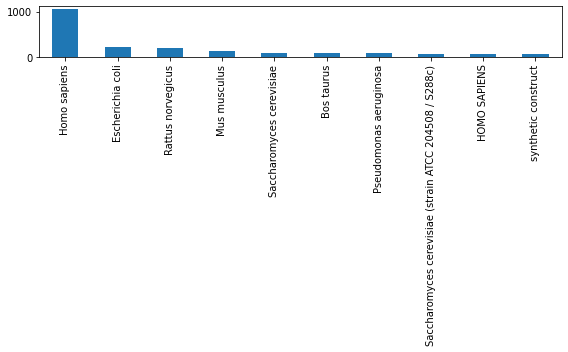

In [ ]:
#To visualize the first 10 in bar chart
AllInterMetalDB_df['Organism'].value_counts()[:10].plot(kind='bar')
plt.savefig("/Sam_DrewDrive/MyDrive/Sample_source.pdf")

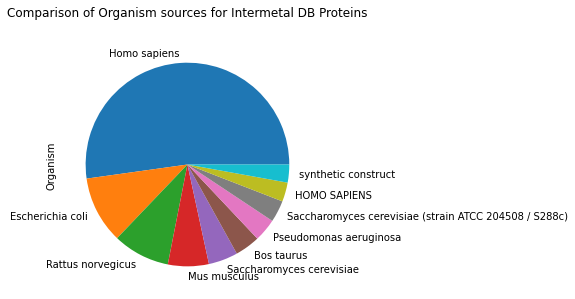

In [188]:
#To visualize the largest organism source of Intermetal DB in pie chart
AllInterMetalDB_df['Organism'].value_counts()[:10].plot.pie(y= 'Organism', figsize=(8,7))
plt.title('Comparison of Organism sources for Intermetal DB Proteins\n')
plt.savefig("/Sam_DrewDrive/MyDrive/IntermetalOrganisms.pdf")

In [ ]:
EDTA_minus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Human_Protein_df

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
0,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,LYS,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cu,1.0
1,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Ca,42.0
2,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,303.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cd,5.0
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
EDTA_plus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#sam: Making sure I have the correct data location in Human Protein; [rows, columns]
Human_Protein_df.iloc[30, 1]

'P00533'

In [ ]:
#sam: Displaying the first five rows
Human_Protein_df.head()

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
0,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,LYS,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cu,1.0
1,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Ca,42.0
2,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,303.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cd,5.0
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0


In [ ]:
#sam: Deleting a column from csv
EDTA_minus_df.drop(EDTA_minus_df.columns[6], axis=1)

,Entry,Entry name,Status,Protein names,Gene names,Length,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),rowSum,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,5.0,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,1.0,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,2.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,66.0,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,2.0,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,1.0,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,2.0,...,0,0,0,1,0,0,0,0,0,0


In [189]:
#Compare EDTA experiment and control and print out proteins common to the two CSV files in Python
EDTA_minus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/minus to compare.csv')
EDTA_plus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/Plus to compare.csv')
c_result = EDTA_plus_df[EDTA_plus_df.apply(tuple,1).isin(EDTA_minus_df.apply(tuple,1))]
(c_result)

,Unnamed: 0,Entry name,Status,Protein names,Gene names
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1
5,A0A087WUL8,NBPFJ_HUMAN,reviewed,Neuroblastoma breakpoint family member 19,NBPF19
9,A0A096LP49,CC187_HUMAN,reviewed,Coiled-coil domain-containing protein 187,CCDC187
...,...,...,...,...,...
11861,Q9Y6X8,ZHX2_HUMAN,reviewed,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023


In [190]:
EDTA_minus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv')
EDTA_plus_df = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
#Our goal is to find all rows without a match from the first file in the second based on a given column.


In [ ]:
EDTA_minus_df[EDTA_minus_df.sum(axis=1)>150]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
EDTA_minus_df

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,3,0,1,0,0,0,0,0,0
1,A0A075B6I1,LV460_HUMAN,reviewed,Immunoglobulin lambda variable 4-60,IGLV4-60,120.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6I4,LVX54_HUMAN,reviewed,Immunoglobulin lambda variable 10-54,IGLV10-54,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6Q5,HV364_HUMAN,reviewed,Immunoglobulin heavy variable 3-64,IGHV3-64,118.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0,0,1,0,0,0,0,0,0,0
4,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,1,0
11909,Q9Y6Z7,COL10_HUMAN,reviewed,Collectin-10 (Collectin liver protein 1) (CL-L...,COLEC10 CLL1 UNQ366/PRO702,277.0,5 out of 5,complement activation [GO:0006956]; complement...,collagen trimer [GO:0005581]; cytoplasm [GO:00...,chemoattractant activity [GO:0042056]; mannose...,...,0,0,0,0,0,0,0,0,0,0
11910,U3KPV4,A3LT2_HUMAN,reviewed,"Alpha-1,3-galactosyltransferase 2 (EC 2.4.1.87...",A3GALT2 A3GALT2P IGBS3S,340.0,5 out of 5,carbohydrate metabolic process [GO:0005975]; c...,Golgi apparatus [GO:0005794]; Golgi cisterna m...,metal ion binding [GO:0046872]; N-acetyllactos...,...,0,0,0,0,0,0,0,0,0,0
11911,W5XKT8,SACA6_HUMAN,reviewed,Sperm acrosome membrane-associated protein 6 (...,SPACA6 SPACA6P UNQ2487/PRO5774,324.0,4 out of 5,fusion of sperm to egg plasma membrane involve...,acrosomal membrane [GO:0002080]; integral comp...,NaN,...,0,0,0,1,0,0,0,0,0,0


In [191]:
#Compare two CSV files in Python
#I need to specify the column that the search will be restricted to
All_EDTA_minus_df = pd.read_csv("/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv", header=None, usecols=[0], names=['col']).drop_duplicates()
All_EDTA_plus_df = pd.read_csv("/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv" , header=None, usecols=[0], names=['col']).drop_duplicates()
# Minus - Plus
pd.merge(All_EDTA_minus_df, All_EDTA_plus_df, on='col', how='left', indicator=True).query("_merge == 'Entry name'")

,col,_merge


In [ ]:
pd.merge

<function pandas.core.reshape.merge.merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'>

In [ ]:
# Plus - Minus
pd.merge(All_EDTA_plus_df, All_EDTA_minus_df, on='col', how='left', indicator=True).query("_merge == 'Entry name'")
print(pd.merge)

<function merge at 0x7fe91062ccb0>


In [ ]:
from numpy.random import randint

In [192]:
from matplotlib.pyplot import figure, show, cm
import itertools as it
import scipy
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42

from scipy.stats import pearsonr
from scipy import stats

from collections import Counter

import seaborn as sns

In [ ]:
Metal_df=  pd.read_csv('/Sam_DrewDrive/MyDrive/human-metal_PDB (5).csv')
Metal_df

In [ ]:
Metal_df.shape

(471, 21)

In [ ]:
Metal_df.columns
Metal_df.dtypes

Id                        object
Unique Proteins           object
Unnamed: 2               float64
UniProt Entry Name        object
Metals                    object
Metals in proteins        object
Occurrence of metals     float64
EDTA Plus                float64
EDTA Minus                object
Location                  object
Position                 float64
Residues                  object
Classification            object
Keywords                  object
Deposition date           object
Resolution               float64
Rvalue                   float64
Organism                  object
Expression system         object
Technique                 object
Assembly                 float64
dtype: object

In [ ]:
mydata = pd.read_csv("/Sam_DrewDrive/MyDrive/human-metal_PDB (5).csv", header = 1)

In [ ]:
mydata

,4WOL,1BPX,Unnamed: 2,TYOBP_HUMAN,K,Ca,36,0,1,CORE,...,ASP,SIGNALING PROTEIN,"alpha-helix transmembrane signalling, SIGNALING PROTEIN",10/16/2014,1.77,0.1833,Homo sapiens,Escherichia coli,X-RAY DIFFRACTION,1.1
0,4WFE,1ETE,NaN,KCNK4_HUMAN,K,Cd,3.0,1.0,1,CORE,...,LYS,METAL TRANSPORT,"Mecha0sensitive ion channel, two-pore domain p...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
1,4WFE,1EXZ,NaN,KCNK4_HUMAN,K,K,22.0,1.0,1,CORE,...,K,METAL TRANSPORT,"Mecha0sensitive ion channel, two-pore domain p...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
2,4WFE,1FE0,NaN,KCNK4_HUMAN,K,Mg,13.0,1.0,1,CORE,...,K,METAL TRANSPORT,"Mecha0sensitive ion channel, two-pore domain p...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
3,4WFE,1KCQ,NaN,KCNK4_HUMAN,Ca,Mn,12.0,1.0,1,SURFACE,...,GLU,METAL TRANSPORT,"Mecha0sensitive ion channel, two-pore domain p...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
4,4WFE,1X9D,NaN,KCNK4_HUMAN,Ca,Na,20.0,1.0,1,SURFACE,...,SER,METAL TRANSPORT,"Mecha0sensitive ion channel, two-pore domain p...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ASP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Extracting specified columns
mydata = pd.read_csv("/Sam_DrewDrive/MyDrive/human-metal_PDB (5).csv", usecols=[1,5,7])

In [ ]:
mydata.to_csv('/Metal_name.csv')

In [ ]:
#Specifying columns and number of rows to extract
mydata = pd.read_csv("/Sam_DrewDrive/MyDrive/human-metal_PDB (5).csv", usecols=[1,5,7], nrows=5)

In [ ]:
mydata

,Unique Proteins,Metals in proteins,EDTA Plus
0,1BPX,Ca,0
1,1ETE,Cd,1
2,1EXZ,K,1
3,1FE0,Mg,1
4,1KCQ,Mn,1


In [ ]:
Human_Protein_df 

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
0,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,LYS,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cu,1.0
1,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Ca,42.0
2,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,303.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cd,5.0
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To extract the needed columns from original Main EDTA data
HumanProtein_file = "/Sam_DrewDrive/MyDrive/Human_Protein.csv"
EDTAMinus_file = "/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv"
EDTAPlus_file = "/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv"
dataset = pd.read_csv(HumanProtein_file)
dataset1 = pd.read_csv(EDTAMinus_file)
dataset2 = pd.read_csv(EDTAPlus_file)
HP_df = pd.DataFrame(dataset)
EDTAMinus_Main_df = pd.DataFrame(dataset1)
EDTAPlus_Main_df = pd.DataFrame(dataset2)
colsHP = [1,3,4,6,7,8]
HP_df = HP_df [HP_df .columns[colsHP]]
colsEDTAPlus = [0,1,2,4,5,6,11,12]
EDTAPlus_Main_df = EDTAPlus_Main_df[EDTAPlus_Main_df.columns[colsEDTAPlus]]
colsEDTAMinus = [0,1,2,4,5,6,11,12]
EDTAMinus_Main_df = EDTAMinus_Main_df[EDTAMinus_Main_df.columns[colsEDTAMinus]]

In [ ]:
EDTAPlus_Main_df 

,Entry,Entry name,Status,Gene names,Length,Annotation,order_pearson_average,HEK293_EDTA_plus_SEC_treatment_12a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,NUDT4B,181.0,5 out of 5,11463.0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,TRBV25-1,114.0,3 out of 5,2377.0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,IGKV1D-17,117.0,3 out of 5,7391.0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,TRAV6 TCRAV5S1,132.0,3 out of 5,7392.0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,TRAV30,112.0,3 out of 5,11657.0,0
...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,254.0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,6905.0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,10591.0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23IP MSTP053,1000.0,5 out of 5,6725.0,0


In [ ]:
HP_df

,Entry,Entry Name,Protein names,Organism,Length,Interacts with
0,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
1,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
2,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
3,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
4,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
...,...,...,...,...,...,...
2496,P12018,VPREB_HUMAN,Immunoglobulin iota chain (CD179 antigen-like ...,Homo sapiens (Human),145,NaN
2497,Q96S55,WRIP1_HUMAN,ATPase WRNIP1 (EC 3.6.1.-) (Werner helicase-in...,Homo sapiens (Human),665,O95786; P28340; P49005; Q9HCU8; Q9H0E2; Q96S55
2498,P19544,WT1_HUMAN,Wilms tumor protein (WT33),Homo sapiens (Human),449,Q92997; Q6A162; P60410; Q6N021; P05067; O14503...
2499,P46937,YAP1_HUMAN,Transcriptional coactivator YAP1 (Yes-associat...,Homo sapiens (Human),504,Q68CP9; P54259; O15169; Q9H305; P35222; Q92841...


In [ ]:
#To extract the needed columns from my Trimmed data of EDTA above 50
HumanProtein_file = "/Sam_DrewDrive/MyDrive/Human_Protein.csv"
EDTAMinus_file = "/EDTAMinus_trimmed.csv"
EDTAPlus_file = "/EDTAPlus_trimmed.csv"
dataset = pd.read_csv(HumanProtein_file)
dataset1 = pd.read_csv(EDTAMinus_file)
dataset2 = pd.read_csv(EDTAPlus_file)
HP_df = pd.DataFrame(dataset)
EDTAMinus_df = pd.DataFrame(dataset1)
EDTAPlus_df = pd.DataFrame(dataset2)
colsHP = [0,1,3,4,6,7,8]
HP_df = HP_df [HP_df .columns[colsHP]]
colsEDTAPlus = [0,1,2,4,5,6,11,12]
EDTAPlus_df = EDTAPlus_df[EDTAPlus_df.columns[colsEDTAPlus]]
colsEDTAMinus = [0,1,2,4,5,6,11,12]
EDTAMinus_df = EDTAMinus_df[EDTAMinus_df.columns[colsEDTAMinus]]

In [ ]:
#DIslaying only selected columns for EDTA Minus
EDTAMinus_df

,Unnamed: 0,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_22a_20220603,HEK293_EDTA_minus_SEC_control_23a_20220603
0,17,0,0,0,0,0,0,0
1,70,0,1,0,0,0,0,0
2,74,1,0,0,0,0,1,0
3,152,0,0,5,1,2,3,2
4,328,0,0,1,1,2,2,2
...,...,...,...,...,...,...,...,...
1594,11860,0,0,0,0,0,0,0
1595,11873,0,0,15,13,17,5,1
1596,11877,0,0,9,2,4,5,1
1597,11908,0,0,0,0,0,1,0


In [ ]:
#DIslaying only selected columns for EDTA Plus
EDTAPlus_df

,Unnamed: 0,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_22a_20220603,HEK293_EDTA_plus_SEC_treatment_23a_20220603
0,16,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0
2,71,0,0,0,1,0,0,0
3,76,0,0,0,0,0,1,0
4,152,0,0,0,0,0,6,7
...,...,...,...,...,...,...,...,...
1747,11827,0,0,0,0,0,6,6
1748,11831,0,0,7,13,14,14,10
1749,11833,0,6,7,6,9,5,3
1750,11865,0,0,0,0,0,0,0


In [ ]:
#I observed that majority of the PDB ID have the same entry name which limited the amount of UniProt ID we have
#I want to convert our dataset to PDB ID and check the comparison instead of trimming our dataset further than complexes with rowSum above 50

In [ ]:
#I tried to use UniProt to find PDB ID but the 
#6495 Uniprot IDs do not have PDB IDs and the less than 6,000 UniProt IDs generated close to 60,000 PDB IDs
#So, I had to trim the EDTA control and experiment to proteins with rumSum of 200 and above

In [ ]:
#Trim the columns to drop for EDTA plus  and save into EDTA plus file 
EDTAMinus_df_new = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv')
EDTAPlus_df_new = pd.read_csv ('/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
EDTAMinus_df_new

In [ ]:
EDTAMinus_df_new[EDTAMinus_df_new.sum(axis=1)>200]
EDTAPlus_df_new[EDTAPlus_df_new.sum(axis=1)>200]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Trim EDTA plus of 200 PSM
EDTAPlus_df_new.drop(EDTAPlus_df_new.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)

In [ ]:
#Trim EDTA Minus of 200 PSM
EDTAMinus_df_new.drop(EDTAMinus_df_new.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)

In [ ]:
EDTAMinus_df_new= EDTAMinus_df_new[EDTAMinus_df_new.sum(axis=1)>200]
EDTAMinus_df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Entry,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
430,O00151,0,0,0,0,1,0,0,0,0,...,15,19,9,8,9,11,4,7,20,9
451,O00231,0,0,3,1,1,3,1,3,1,...,0,0,0,0,0,0,0,0,0,1
452,O00232,0,0,0,0,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
456,O00244,6,1,0,0,0,0,0,0,0,...,0,0,0,15,66,45,24,18,13,8
460,O00264,0,0,11,7,3,6,12,10,17,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,Q9Y520,0,0,51,53,35,43,91,67,40,...,1,2,1,1,2,0,2,2,0,1
11837,Q9Y696,0,0,0,0,0,0,3,0,0,...,69,72,30,16,7,5,2,3,0,0
11840,Q9Y6A5,0,0,1,1,1,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
11858,Q9Y6G9,0,0,3,5,0,12,17,22,111,...,0,7,3,1,1,1,0,1,0,0


In [ ]:
EDTAPlus_df_new= EDTAPlus_df_new[EDTAPlus_df_new.sum(axis=1)>200]
EDTAPlus_df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Entry,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
441,O00151,0,0,0,0,1,0,0,0,8,...,12,0,10,3,7,6,5,0,4,7
460,O00231,0,0,0,0,5,3,6,11,0,...,2,17,0,0,0,1,0,0,0,0
461,O00232,0,0,0,0,2,1,5,7,0,...,0,11,0,0,0,0,1,1,2,0
466,O00264,0,2,15,5,6,12,14,7,0,...,0,6,0,0,0,0,0,0,0,0
475,O00299,0,0,0,0,0,0,0,0,55,...,13,5,40,22,18,17,15,12,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,Q9Y520,0,0,0,4,34,57,40,27,1,...,3,4,1,0,0,0,0,0,1,0
11733,Q9Y5K6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11799,Q9Y6A5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11817,Q9Y6G9,0,0,0,0,0,1,3,3,1,...,0,12,4,0,0,0,0,0,0,0


In [ ]:
HP_df

,PDB ID,Entry,Entry Name,Protein names,Organism,Length,Interacts with
0,3P1O,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
1,4DHQ,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
2,4DHR,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
3,4DHU,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
4,6FAV,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
...,...,...,...,...,...,...,...
2496,2H32,P12018,VPREB_HUMAN,Immunoglobulin iota chain (CD179 antigen-like ...,Homo sapiens (Human),145,NaN
2497,3VHS,Q96S55,WRIP1_HUMAN,ATPase WRNIP1 (EC 3.6.1.-) (Werner helicase-in...,Homo sapiens (Human),665,O95786; P28340; P49005; Q9HCU8; Q9H0E2; Q96S55
2498,5KL2,P19544,WT1_HUMAN,Wilms tumor protein (WT33),Homo sapiens (Human),449,Q92997; Q6A162; P60410; Q6N021; P05067; O14503...
2499,6G6X,P46937,YAP1_HUMAN,Transcriptional coactivator YAP1 (Yes-associat...,Homo sapiens (Human),504,Q68CP9; P54259; O15169; Q9H305; P35222; Q92841...


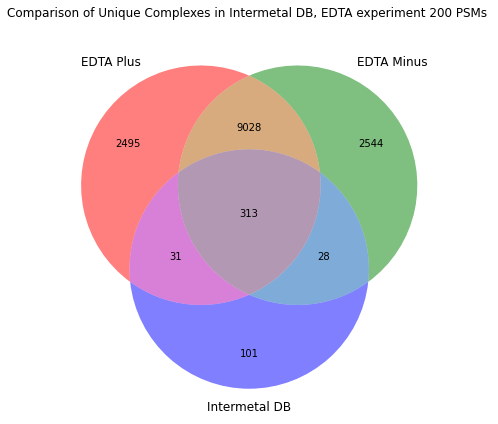

In [194]:
#For unweighted Venn diagram (Just define the Venn diagram as unweighted). 
#This makes the Venn diagram size to be the size irrespective of the content
#Define   alpha = 0.5 to chose color thickness. The higher alpha the thicker the colour
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
venn3_unweighted([set(EDTAPlus_df_new['Entry'].to_list()),
       set(EDTAMinus_df_new['Entry'].to_list()),
       set(HP_df['Entry'].to_list()),],
       set_labels=('EDTA Plus', 'EDTA Minus', 'Intermetal DB'),
       alpha = 0.5)
plt.title('Comparison of Unique Complexes in Intermetal DB, EDTA experiment 200 PSMs \n')
plt.savefig("/Sam_DrewDrive/MyDrive/Fig.1.Elution200rowSum.pdf")

In [ ]:
#Trim the columns to drop for EDTA plus  and save into EDTA plus file Remove column 32 for plus
import pandas as pd
EDTAMinus_df_50 = pd.read_csv('/Sam_DrewDrive/MyDrive/HEK293_EDTA_minus_SEC_Control_20220626.csv')
EDTAPlus_df_50 = pd.read_csv ('/Sam_DrewDrive/MyDrive/HEK293_EDTA_plus_SEC_treatment_20220626.csv')
EDTAPlus_df_50

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Trim EDTA plus of 50 PSM
EDTAPlus_df_50.drop(EDTAPlus_df_50.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)
EDTAMinus_df_50.drop(EDTAMinus_df_50.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1,inplace=True)

In [ ]:
EDTAPlus_df_50

,Entry,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
0,A0A024RBG1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,A0A075B6N4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A075B6S4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A075B6T7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A0A087WSZ9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11863,Q9Y6Y0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11864,Q9Y6Y1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11865,Q9Y6Y8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Generate only EDTA plus of 50 PSM
EDTAPlus_df= EDTAPlus_df_50[EDTAPlus_df_50.sum(axis=1)>50]
EDTAPlus_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Entry,HEK293_EDTA_plus_SEC_treatment_12a_20220603,HEK293_EDTA_plus_SEC_treatment_13a_20220603,HEK293_EDTA_plus_SEC_treatment_14a_20220603,HEK293_EDTA_plus_SEC_treatment_15a_20220603,HEK293_EDTA_plus_SEC_treatment_16a_20220603,HEK293_EDTA_plus_SEC_treatment_17a_20220603,HEK293_EDTA_plus_SEC_treatment_18a_20220603,HEK293_EDTA_plus_SEC_treatment_19a_20220603,HEK293_EDTA_plus_SEC_treatment_20a_20220603,...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
16,A0A0B4J2D5,0,0,0,0,0,0,0,6,52,...,4,6,36,7,11,6,3,6,3,5
25,A0A0U1RRE5,0,0,0,0,0,0,0,0,0,...,0,0,5,24,12,11,3,2,4,3
71,A0AVT1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,5,8
76,A0MZ66,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,A5YKK6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,Q9Y6K9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,1
11831,Q9Y6M1,0,0,8,7,13,14,21,8,0,...,0,8,0,0,0,0,0,0,0,0
11833,Q9Y6M9,0,6,21,7,6,9,8,2,0,...,0,1,0,0,0,0,0,0,0,0
11865,Q9Y6Y8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EDTAMinus_df= EDTAMinus_df_50[EDTAMinus_df_50.sum(axis=1)>50]
EDTAMinus_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Entry,HEK293_EDTA_minus_SEC_control_12a_20220603,HEK293_EDTA_minus_SEC_control_13a_20220603,HEK293_EDTA_minus_SEC_control_14a_20220603,HEK293_EDTA_minus_SEC_control_15a_20220603,HEK293_EDTA_minus_SEC_control_16a_20220603,HEK293_EDTA_minus_SEC_control_17a_20220603,HEK293_EDTA_minus_SEC_control_18a_20220603,HEK293_EDTA_minus_SEC_control_19a_20220603,HEK293_EDTA_minus_SEC_control_20a_20220603,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
17,A0A0B4J2D5,0,0,0,0,0,0,3,5,0,...,14,66,14,7,3,4,3,2,6,2
70,A0AVT1,0,1,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10,1
74,A0MZ66,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,A5YKK6,0,0,4,5,1,2,1,0,7,...,1,1,0,0,0,0,0,0,0,0
328,A8MWD9,0,0,1,1,1,2,2,2,2,...,2,0,0,2,2,2,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11860,Q9Y6I3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11873,Q9Y6M1,0,0,15,15,13,17,12,11,19,...,0,0,0,0,0,0,0,0,0,0
11877,Q9Y6M9,0,0,19,9,2,4,5,2,6,...,0,0,0,0,0,0,0,0,0,0
11908,Q9Y6Y8,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0


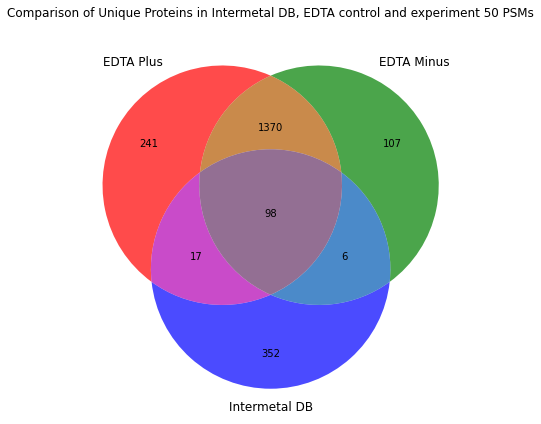

In [ ]:
#Plot Unweighted venn diagram of InterMetal PDB with ETDA plus and Minus with 50 PSMs
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
plt.figure(figsize=(8,6))
venn3_unweighted([set(EDTAPlus_df['Entry'].to_list()),
       set(EDTAMinus_df['Entry'].to_list()),
       set(HP_df['Entry'].to_list()),],
       set_labels=('EDTA Plus', 'EDTA Minus', 'Intermetal DB'),
       alpha = 0.7
     )
plt.title('Comparison of Unique Proteins in Intermetal DB, EDTA control and experiment 50 PSMs\n')
plt.savefig("/Sam_DrewDrive/MyDrive/50Uniqueelutions.pdf")

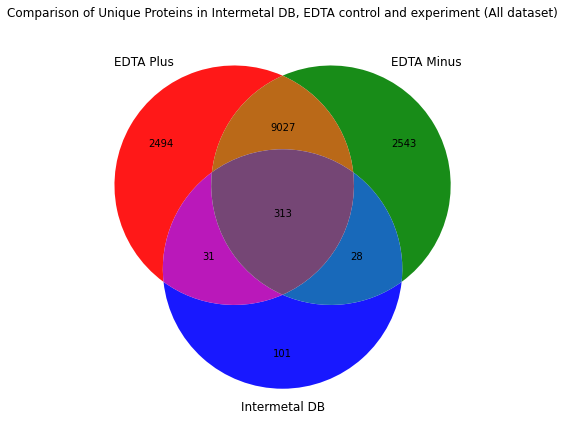

In [ ]:
#Plot Unweighted venn diagram of InterMetal PDBwith all our ETDA control and experiment dataset
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
plt.figure(figsize=(8,6))
venn3_unweighted([set(EDTAPlus_Main_df['Entry name'].to_list()),
       set(EDTAMinus_Main_df['Entry name'].to_list()),
       set(HP_df['Entry Name'].to_list()),],
       set_labels=('EDTA Plus', 'EDTA Minus', 'Intermetal DB'),
       alpha= 0.9
     )
plt.title('Comparison of Unique Proteins in Intermetal DB, EDTA control and experiment (All dataset)\n')
plt.savefig("/Sam_DrewDrive/MyDrive/TotalComparison.pdf")

In [ ]:
Human_Protein_df

,Id,Entry name,UniProt Entry Name,Metals,EDTA Plus,EDTA Minus,Location,Chain No,Position,Residues,...,Keywords,Deposition date,Resolution,Rvalue,Organism,Expression system,Technique,Assembly,Metals in proteins,Occurrence
0,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,LYS,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cu,1.0
1,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,301.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Ca,42.0
2,4WFE,Q9NYG8,KCNK4_HUMAN,K,Yes,Yes,Interface,NaN,303.0,K,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Cd,5.0
3,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,301.0,GLU,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,K,20.0
4,4WFE,Q9NYG8,KCNK4_HUMAN,Ca,Yes,Yes,SURFACE,NaN,305.0,SER,...,"Mechanosensitive ion channel, two-pore domain ...",9/15/2014,2.5,0.19908,Homo sapiens,Komagataella pastoris,X-RAY DIFFRACTION,1.0,Mg,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
HP_df

,PDB ID,Entry,Entry Name,Protein names,Organism,Length,Interacts with
0,3P1O,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
1,4DHQ,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
2,4DHR,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
3,4DHU,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
4,6FAV,P31947,1433S_HUMAN,14-3-3 protein sigma (Epithelial cell marker p...,Homo sapiens (Human),248,P00519; Q96IF1; P10398; Q92934; P15056; Q68D86...
...,...,...,...,...,...,...,...
2496,2H32,P12018,VPREB_HUMAN,Immunoglobulin iota chain (CD179 antigen-like ...,Homo sapiens (Human),145,NaN
2497,3VHS,Q96S55,WRIP1_HUMAN,ATPase WRNIP1 (EC 3.6.1.-) (Werner helicase-in...,Homo sapiens (Human),665,O95786; P28340; P49005; Q9HCU8; Q9H0E2; Q96S55
2498,5KL2,P19544,WT1_HUMAN,Wilms tumor protein (WT33),Homo sapiens (Human),449,Q92997; Q6A162; P60410; Q6N021; P05067; O14503...
2499,6G6X,P46937,YAP1_HUMAN,Transcriptional coactivator YAP1 (Yes-associat...,Homo sapiens (Human),504,Q68CP9; P54259; O15169; Q9H305; P35222; Q92841...


In [ ]:
#This is used to find the the complexes that are present in EDTA Experiment and Intermetal DB
EDTA_plus_df[(EDTA_plus_df['Entry name']).isin(HP_df['Entry Name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_41a_20220603,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603
430,L0R8F8,MIDUO_HUMAN,reviewed,MIEF1 upstream open reading frame protein (Alt...,MIEF1,70.0,4 out of 5,positive regulation of mitochondrial translati...,mitochondrial matrix [GO:0005759]; mitochondri...,NaN,...,0,0,1,0,0,0,0,0,0,0
463,O00244,ATOX1_HUMAN,reviewed,Copper transport protein ATOX1 (Metal transpor...,ATOX1 HAH1,68.0,5 out of 5,cellular copper ion homeostasis [GO:0006878]; ...,cytosol [GO:0005829],copper chaperone activity [GO:0016531]; copper...,...,0,0,0,5,48,25,13,3,11,6
572,O14561,ACPM_HUMAN,reviewed,"Acyl carrier protein, mitochondrial (ACP) (CI-...",NDUFAB1,156.0,5 out of 5,fatty acid biosynthetic process [GO:0006633]; ...,mitochondrial inner membrane [GO:0005743]; mit...,acyl binding [GO:0000035]; acyl carrier activi...,...,4,0,15,9,5,1,1,0,1,1
581,O14617,AP3D1_HUMAN,reviewed,AP-3 complex subunit delta-1 (AP-3 complex sub...,AP3D1 PRO0039,1153.0,5 out of 5,anterograde axonal transport [GO:0008089]; ant...,AP-3 adaptor complex [GO:0030123]; axon cytopl...,NaN,...,0,0,0,0,0,0,0,0,0,0
593,O14656,TOR1A_HUMAN,reviewed,Torsin-1A (Dystonia 1 protein) (Torsin ATPase-...,TOR1A DQ2 DYT1 TA TORA,332.0,5 out of 5,cell adhesion [GO:0007155]; chaperone cofactor...,cytoplasmic vesicle membrane [GO:0030659]; cyt...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,Q9Y3D3,RT16_HUMAN,reviewed,"28S ribosomal protein S16, mitochondrial (MRP-...",MRPS16 RPMS16 CGI-132,137.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cytosol [GO:0005829]; mitochondrial inner memb...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,1,0
11596,Q9Y3D5,RT18C_HUMAN,reviewed,"28S ribosomal protein S18c, mitochondrial (MRP...",MRPS18C CGI-134,142.0,4 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,small ribosomal subunit rRNA binding [GO:00701...,...,0,0,0,0,0,0,0,0,0,0
11600,Q9Y3D9,RT23_HUMAN,reviewed,"28S ribosomal protein S23, mitochondrial (MRP-...",MRPS23 CGI-138 HSPC329,190.0,5 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,RNA binding [GO:0003723]; structural constitue...,...,0,1,0,1,2,0,0,0,0,0
11790,Q9Y676,RT18B_HUMAN,reviewed,"28S ribosomal protein S18b, mitochondrial (MRP...",MRPS18B C6orf14 HSPC183 PTD017,258.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cell junction [GO:0030054]; mitochondrial inne...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the complexes that are present in EDTA Control and Intermetal DB
EDTA_minus_df[EDTA_minus_df['Entry name'].isin(HP_df['Entry Name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
243,A6NK06,IRG1_HUMAN,reviewed,Cis-aconitate decarboxylase (CAD) (EC 4.1.1.6)...,ACOD1 IRG1,481.0,5 out of 5,cellular response to interferon-beta [GO:00354...,mitochondrion [GO:0005739],aconitate decarboxylase activity [GO:0047613],...,0,1,0,0,0,0,0,0,0,0
422,L0R8F8,MIDUO_HUMAN,reviewed,MIEF1 upstream open reading frame protein (Alt...,MIEF1,70.0,4 out of 5,positive regulation of mitochondrial translati...,mitochondrial matrix [GO:0005759]; mitochondri...,NaN,...,0,0,0,0,0,0,0,0,0,0
456,O00244,ATOX1_HUMAN,reviewed,Copper transport protein ATOX1 (Metal transpor...,ATOX1 HAH1,68.0,5 out of 5,cellular copper ion homeostasis [GO:0006878]; ...,cytosol [GO:0005829],copper chaperone activity [GO:0016531]; copper...,...,0,0,0,15,66,45,24,18,13,8
561,O14561,ACPM_HUMAN,reviewed,"Acyl carrier protein, mitochondrial (ACP) (CI-...",NDUFAB1,156.0,5 out of 5,fatty acid biosynthetic process [GO:0006633]; ...,mitochondrial inner membrane [GO:0005743]; mit...,acyl binding [GO:0000035]; acyl carrier activi...,...,4,2,9,2,3,1,0,0,0,0
568,O14617,AP3D1_HUMAN,reviewed,AP-3 complex subunit delta-1 (AP-3 complex sub...,AP3D1 PRO0039,1153.0,5 out of 5,anterograde axonal transport [GO:0008089]; ant...,AP-3 adaptor complex [GO:0030123]; axon cytopl...,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11625,Q9Y3D3,RT16_HUMAN,reviewed,"28S ribosomal protein S16, mitochondrial (MRP-...",MRPS16 RPMS16 CGI-132,137.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cytosol [GO:0005829]; mitochondrial inner memb...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,0,0
11626,Q9Y3D5,RT18C_HUMAN,reviewed,"28S ribosomal protein S18c, mitochondrial (MRP...",MRPS18C CGI-134,142.0,4 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,small ribosomal subunit rRNA binding [GO:00701...,...,0,0,0,0,0,0,0,0,0,0
11630,Q9Y3D9,RT23_HUMAN,reviewed,"28S ribosomal protein S23, mitochondrial (MRP-...",MRPS23 CGI-138 HSPC329,190.0,5 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,RNA binding [GO:0003723]; structural constitue...,...,0,0,0,1,0,0,0,0,0,0
11829,Q9Y676,RT18B_HUMAN,reviewed,"28S ribosomal protein S18b, mitochondrial (MRP...",MRPS18B C6orf14 HSPC183 PTD017,258.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cell junction [GO:0030054]; mitochondrial inne...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#This is used to find the the complexes that are present in EDTA Control and Intermetal DB
EDTA_minus_df[(EDTA_minus_df['Entry name']).isin(HP_df['Entry Name'])]

,Entry,Entry name,Status,Protein names,Gene names,Length,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
243,A6NK06,IRG1_HUMAN,reviewed,Cis-aconitate decarboxylase (CAD) (EC 4.1.1.6)...,ACOD1 IRG1,481.0,5 out of 5,cellular response to interferon-beta [GO:00354...,mitochondrion [GO:0005739],aconitate decarboxylase activity [GO:0047613],...,0,1,0,0,0,0,0,0,0,0
422,L0R8F8,MIDUO_HUMAN,reviewed,MIEF1 upstream open reading frame protein (Alt...,MIEF1,70.0,4 out of 5,positive regulation of mitochondrial translati...,mitochondrial matrix [GO:0005759]; mitochondri...,NaN,...,0,0,0,0,0,0,0,0,0,0
456,O00244,ATOX1_HUMAN,reviewed,Copper transport protein ATOX1 (Metal transpor...,ATOX1 HAH1,68.0,5 out of 5,cellular copper ion homeostasis [GO:0006878]; ...,cytosol [GO:0005829],copper chaperone activity [GO:0016531]; copper...,...,0,0,0,15,66,45,24,18,13,8
561,O14561,ACPM_HUMAN,reviewed,"Acyl carrier protein, mitochondrial (ACP) (CI-...",NDUFAB1,156.0,5 out of 5,fatty acid biosynthetic process [GO:0006633]; ...,mitochondrial inner membrane [GO:0005743]; mit...,acyl binding [GO:0000035]; acyl carrier activi...,...,4,2,9,2,3,1,0,0,0,0
568,O14617,AP3D1_HUMAN,reviewed,AP-3 complex subunit delta-1 (AP-3 complex sub...,AP3D1 PRO0039,1153.0,5 out of 5,anterograde axonal transport [GO:0008089]; ant...,AP-3 adaptor complex [GO:0030123]; axon cytopl...,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11625,Q9Y3D3,RT16_HUMAN,reviewed,"28S ribosomal protein S16, mitochondrial (MRP-...",MRPS16 RPMS16 CGI-132,137.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cytosol [GO:0005829]; mitochondrial inner memb...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,0,0
11626,Q9Y3D5,RT18C_HUMAN,reviewed,"28S ribosomal protein S18c, mitochondrial (MRP...",MRPS18C CGI-134,142.0,4 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,small ribosomal subunit rRNA binding [GO:00701...,...,0,0,0,0,0,0,0,0,0,0
11630,Q9Y3D9,RT23_HUMAN,reviewed,"28S ribosomal protein S23, mitochondrial (MRP-...",MRPS23 CGI-138 HSPC329,190.0,5 out of 5,mitochondrial translational elongation [GO:007...,mitochondrial inner membrane [GO:0005743]; mit...,RNA binding [GO:0003723]; structural constitue...,...,0,0,0,1,0,0,0,0,0,0
11829,Q9Y676,RT18B_HUMAN,reviewed,"28S ribosomal protein S18b, mitochondrial (MRP...",MRPS18B C6orf14 HSPC183 PTD017,258.0,5 out of 5,mitochondrial translation [GO:0032543]; mitoch...,cell junction [GO:0030054]; mitochondrial inne...,structural constituent of ribosome [GO:0003735],...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Combinedf = pd.merge(EDTA_plus_df, EDTA_minus_df, on='Entry name', how='outer').dropna()
Combinedf

,Entry_x,Entry name,Status_x,Protein names_x,Gene names_x,Length_x,Annotation_x,Gene ontology (biological process)_x,Gene ontology (cellular component)_x,Gene ontology (molecular function)_x,...,HEK293_EDTA_minus_SEC_control_41a_20220603,HEK293_EDTA_minus_SEC_control_42a_20220603,HEK293_EDTA_minus_SEC_control_43a_20220603,HEK293_EDTA_minus_SEC_control_44a_20220603,HEK293_EDTA_minus_SEC_control_45a_20220603,HEK293_EDTA_minus_SEC_control_46a_20220603,HEK293_EDTA_minus_SEC_control_47a_20220603,HEK293_EDTA_minus_SEC_control_48a_20220603,HEK293_EDTA_minus_SEC_control_49a_20220603,HEK293_EDTA_minus_SEC_control_50a_20220603
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,A0A096LP49,CC187_HUMAN,reviewed,Coiled-coil domain-containing protein 187,CCDC187,1063.0,2 out of 5,microtubule anchoring [GO:0034453],centrosome [GO:0005813],microtubule binding [GO:0008017],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,A0A0B4J1U7,HV601_HUMAN,reviewed,Immunoglobulin heavy variable 6-1,IGHV6-1,121.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
18,A0A0C4DH36,HV338_HUMAN,reviewed,Probable non-functional immunoglobulin heavy v...,IGHV3-38,116.0,4 out of 5,B cell receptor signaling pathway [GO:0050853]...,external side of plasma membrane [GO:0009897];...,antigen binding [GO:0003823]; immunoglobulin r...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,A0A1B0GTS1,HSFX4_HUMAN,reviewed,"Heat shock transcription factor, X-linked memb...",HSFX4,333.0,2 out of 5,regulation of transcription by RNA polymerase ...,nucleus [GO:0005634],DNA-binding transcription factor activity [GO:...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11867,Q9Y6X6,MYO16_HUMAN,reviewed,Unconventional myosin-XVI (Neuronal tyrosine-p...,MYO16 KIAA0865 MYO16B NYAP3,1858.0,5 out of 5,cerebellum development [GO:0021549]; negative ...,cytoplasm [GO:0005737]; myosin complex [GO:001...,actin filament binding [GO:0051015]; ATP bindi...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11868,Q9Y6X8,ZHX2_HUMAN,reviewed,Zinc fingers and homeoboxes protein 2 (Alpha-f...,ZHX2 AFR1 KIAA0854 RAF,837.0,5 out of 5,mRNA catabolic process [GO:0006402]; negative ...,chromatin [GO:0000785]; cytosol [GO:0005829]; ...,DNA binding [GO:0003677]; DNA-binding transcri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11869,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11871,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Combinedf = (EDTA_plus_df.merge(
            EDTA_minus_df.groupby('Entry name')['Length'].apply(np.array),
            how='left',
            left_on='Entry name',
            right_index=True))
Combinedf

,Entry,Entry name,Status,Protein names,Gene names,Length_x,Annotation,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),...,HEK293_EDTA_plus_SEC_treatment_42a_20220603,HEK293_EDTA_plus_SEC_treatment_43a_20220603,HEK293_EDTA_plus_SEC_treatment_44a_20220603,HEK293_EDTA_plus_SEC_treatment_45a_20220603,HEK293_EDTA_plus_SEC_treatment_46a_20220603,HEK293_EDTA_plus_SEC_treatment_47a_20220603,HEK293_EDTA_plus_SEC_treatment_48a_20220603,HEK293_EDTA_plus_SEC_treatment_49a_20220603,HEK293_EDTA_plus_SEC_treatment_50a_20220603,Length_y
0,A0A024RBG1,NUD4B_HUMAN,reviewed,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,181.0,5 out of 5,adenosine 5'-(hexahydrogen pentaphosphate) cat...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,bis(5'-adenosyl)-hexaphosphatase activity [GO:...,...,0,0,1,0,0,0,0,0,0,[181.0]
1,A0A075B6N4,TVBY1_HUMAN,reviewed,T cell receptor beta variable 25-1,TRBV25-1,114.0,3 out of 5,adaptive immune response [GO:0002250]; cell su...,plasma membrane [GO:0005886]; T cell receptor ...,NaN,...,0,0,0,0,0,0,0,0,0,NaN
2,A0A075B6S4,KVD17_HUMAN,reviewed,Immunoglobulin kappa variable 1D-17,IGKV1D-17,117.0,3 out of 5,adaptive immune response [GO:0002250]; immune ...,extracellular space [GO:0005615]; immunoglobul...,NaN,...,0,0,0,0,0,0,0,0,0,[117.0]
3,A0A075B6T7,TVA6_HUMAN,reviewed,T cell receptor alpha variable 6,TRAV6 TCRAV5S1,132.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,0,[132.0]
4,A0A087WSZ9,TVA30_HUMAN,reviewed,T cell receptor alpha variable 30,TRAV30,112.0,3 out of 5,adaptive immune response [GO:0002250]; respons...,T cell receptor complex [GO:0042101],NaN,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,Q9Y6X9,MORC2_HUMAN,reviewed,ATPase MORC2 (EC 3.6.1.-) (MORC family CW-type...,MORC2 KIAA0852 ZCWCC1,1032.0,5 out of 5,cellular response to DNA damage stimulus [GO:0...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ATPase activity [GO:0016887]; ATP binding [GO:...,...,0,0,0,0,0,0,0,0,0,[1032.0]
11863,Q9Y6Y0,NS1BP_HUMAN,reviewed,Influenza virus NS1A-binding protein (NS1-BP) ...,IVNS1ABP ARA3 FLARA3 KIAA0850 KLHL39 NS1 NS1BP...,642.0,5 out of 5,negative regulation of intrinsic apoptotic sig...,cytoskeleton [GO:0005856]; cytosol [GO:0005829...,NaN,...,0,0,0,0,0,0,0,0,0,[642.0]
11864,Q9Y6Y1,CMTA1_HUMAN,reviewed,Calmodulin-binding transcription activator 1,CAMTA1 KIAA0833 MSTP023,1673.0,5 out of 5,positive regulation of calcineurin-NFAT signal...,cytosol [GO:0005829]; nucleolus [GO:0005730]; ...,double-stranded DNA binding [GO:0003690]; tran...,...,0,0,0,0,0,1,0,0,0,[1673.0]
11865,Q9Y6Y8,S23IP_HUMAN,reviewed,SEC23-interacting protein (p125),SEC23IP MSTP053,1000.0,5 out of 5,COPII vesicle coating [GO:0048208]; Golgi orga...,COPII-coated ER to Golgi transport vesicle [GO...,metal ion binding [GO:0046872]; phospholipase ...,...,0,0,0,0,0,0,0,0,0,[1000.0]
